----------------------------------
# Case Study: Factors Influencing Life Expectancy using **Linear Regression**
----------------------------------

## Context: 
    
- There have been lot of studies undertaken in the past, on factors affecting life expectancy, considering demographic variables, income composition and mortality rates.
- It was found that affect of immunization and human development index was not taken into account in the past.
- Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this case study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well.
- In this case study, we will use linear regression to see the effect of various factors on Life Expectancy.

------------------------------

## Problem:

**The data-set aims to answer the following key questions:**

- Does various predicting factors really affect the Life expectancy?
- What are the predicting variables actually affecting the life expectancy?
- Should a country having a lower life expectancy value increase its health care expenditure in order to improve its average lifespan?
- Do Infant and Adult mortality rates affect life expectancy?
- Does Life Expectancy has positive or negative correlation with a country's status (developing or developed), lifestyle, GDP,  etc.
- What is the impact of schooling on the lifespan of humans?
- Does Life Expectancy have positive or negative relationship with drinking alcohol?
- What is the impact of Immunization coverage (for various disease like Measles,Hepatitis B) on life Expectancy?

------------------------------

## Attribute Information:

- Country: Country
- Year: Year
- Status: Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in liters of pure alcohol)
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness  1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

------------------------
# Concepts to Cover
------------------------
- 1. Overview of the data
- 2. Data Visualization
- 3. Data Preparation
- 4. Choose Model, Train and Evaluate
- 5. Conclusion
- 6. Add-on: Statsmodels

# Let's start coding!

### Import libraries

In [ ]:
# Import necessary libraries.
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

### Load and explore the data

In [ ]:
# Load the data into pandas dataframe
path = "C://Users/Laveena Garg/Desktop/Linear regression/Life Expectancy Data.csv"
#path='D:/case study/linear regression/session 2/'
data = pd.read_csv(path)              # Make changes to the path depending on where your data file is stored.

### Overview of the data

In [ ]:
# let us make another copy of data
df = data.copy()
df.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   Thinness  1-19 years  Thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

## Think about it:

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column has different scales of data.
    - e.g. "Life expectancy" column : from 59.2 to 65.0, as we can see, in the first 5 rows.
    - Alcohol: 0.01
    - Measles: from 430 to 3013

    So, what do you think about the effect of the different scales (so features are 100 times of the other features, will the numerical values of features have any effect on the model?)



### Check number of rows and columns

In [ ]:
df.shape

(2938, 22)

### Lets us Have a look at the column names

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### Check column types and missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under-five deaths                2938 non-null   int64  
 12  Polio               

**Observations**
* There are 2938 rows and 22 columns
* Column names have spaces and spacial characters which we would fix
* Status is categorical variable and all other variables are numerical type
* Dependent Variable is Life Expectancy

### Column name has spaces in them so let us fix them

In [ ]:
df.columns = [col.replace(' ','_') for col in df.columns]
df.columns = [col.replace('/','_') for col in df.columns]
df.columns = [col.replace('-','_') for col in df.columns]

### Lets us look at missing values

In [ ]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
Thinness__1_19_years                34
Thinness_5_9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

### let us fix missing values

In [ ]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)


In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()

Country                             193
Year                                 16
Status                                2
Life_expectancy                     362
Adult_Mortality                     425
Infant_deaths                       209
Alcohol                            1077
Percentage_expenditure             2328
Hepatitis_B                          87
Measles                             958
BMI                                 608
Under_five_deaths                   252
Polio                                73
Total_expenditure                   819
Diphtheria                           81
HIV_AIDS                            200
GDP                                2491
Population                         2279
Thinness__1_19_years                200
Thinness_5_9_years                  207
Income_composition_of_resources     625
Schooling                           173
dtype: int64

### Lets look at summary of our data

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # to display numbers in digits
df.describe(include='all').T

count unique         top  freq  \
Country                             2938    193       Samoa    16   
Year                            2938.000    NaN         NaN   NaN   
Status                              2938      2  Developing  2426   
Life_expectancy                 2938.000    NaN         NaN   NaN   
Adult_Mortality                 2938.000    NaN         NaN   NaN   
Infant_deaths                   2938.000    NaN         NaN   NaN   
Alcohol                         2938.000    NaN         NaN   NaN   
Percentage_expenditure          2938.000    NaN         NaN   NaN   
Hepatitis_B                     2938.000    NaN         NaN   NaN   
Measles                         2938.000    NaN         NaN   NaN   
BMI                             2938.000    NaN         NaN   NaN   
Under_five_deaths               2938.000    NaN         NaN   NaN   
Polio                           2938.000    NaN         NaN   NaN   
Total_expenditure               2938.000    NaN         NaN   NaN   
Diphtheria                      2938.000    NaN         NaN   NaN   
HIV_AIDS                        2938.000    NaN         NaN   NaN   
GDP                             2938.000    NaN         NaN   NaN   
Population                      2938.000    NaN         NaN   NaN   
Thinness__1_19_years            2938.000    NaN         NaN   NaN   
Thinness_5_9_years              2938.000    NaN         NaN   NaN   
Income_composition_of_resources 2938.000    NaN         NaN   NaN   
Schooling                       2938.000    NaN         NaN   NaN   

                                        mean          std      min        25%  \
Country                                  NaN          NaN      NaN        NaN   
Year                                2007.519        4.614 2000.000   2004.000   
Status                                   NaN          NaN      NaN        NaN   
Life_expectancy                       69.235        9.509   36.300     63.200   
Adult_Mortality                      164.726      124.086    1.000     74.000   
Infant_deaths                         30.304      117.927    0.000      0.000   
Alcohol                                4.547        3.922    0.010      1.093   
Percentage_expenditure               738.251     1987.915    0.000      4.685   
Hepatitis_B                           83.022       22.997    1.000     82.000   
Measles                             2419.592    11467.272    0.000      0.000   
BMI                                   38.381       19.935    1.000     19.400   
Under_five_deaths                     42.036      160.446    0.000      0.000   
Polio                                 82.618       23.367    3.000     78.000   
Total_expenditure                      5.924        2.401    0.370      4.370   
Diphtheria                            82.393       23.656    2.000     78.000   
HIV_AIDS                               1.742        5.078    0.100      0.100   
GDP                                 6611.524    13296.603    1.681    580.487   
Population                      10230851.228 54022417.455   34.000 418917.250   
Thinness__1_19_years                   4.822        4.398    0.100      1.600   
Thinness_5_9_years                     4.852        4.486    0.100      1.600   
Income_composition_of_resources        0.630        0.205    0.000      0.504   
Schooling                             12.010        3.265    0.000     10.300   

                                        50%         75%            max  
Country                                 NaN         NaN            NaN  
Year                               2008.000    2012.000       2015.000  
Status                                  NaN         NaN            NaN  
Life_expectancy                      72.100      75.600         89.000  
Adult_Mortality                     144.000     227.000        723.000  
Infant_deaths                         3.000      22.000       1800.000  
Alcohol                               3.755       7.390         17.870  

## Insights:

- The "Status" column has 2 unique values. i.e. The values are "Developing" and "Developed"
- The "Country" column has 133 unique values. i.e. The data is collected from 133 countries.
- Year starts from 2000 to 2015
- Average Life expectancy is 69 years



- We already know that the Dtype (data-type) of the two columns: "Status" and "Country" is object. So, we need to convert them to categorical type .

## Before we further process the data, let's have a look at the graphical visualization of the data to understand it in a better way!

## Univaraite analysis

In [ ]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Lets expore dependent varaible life expectancy

In [ ]:
df.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing           65.000          263.000   
1  Afghanistan  2014  Developing           59.900          271.000   
2  Afghanistan  2013  Developing           59.900          268.000   
3  Afghanistan  2012  Developing           59.500          272.000   
4  Afghanistan  2011  Developing           59.200          275.000   

   Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  ...  \
0             62    0.010                  71.280       65.000     1154  ...   
1             64    0.010                  73.524       62.000      492  ...   
2             66    0.010                  73.219       64.000      430  ...   
3             69    0.010                  78.184       67.000     2787  ...   
4             71    0.010                   7.097       68.000     3013  ...   

   Polio  Total_expenditure  Diphtheria  HIV_AIDS     GDP   Population  \
0  6.000              8.160      65.000     0.100 584.259 33736494.000   
1 58.000              8.180      62.000     0.100 612.697   327582.000   
2 62.000              8.130      64.000     0.100 631.745 31731688.000   
3 67.000              8.520      67.000     0.100 669.959  3696958.000   
4 68.000              7.870      68.000     0.100  63.537  2978599.000   

   Thinness__1_19_years  Thinness_5_9_years  Income_composition_of_resources  \
0                17.200              17.300                            0.479   
1                17.500              17.500                            0.476   
2                17.700              17.700                            0.470   
3                17.900              18.000                            0.463   
4                18.200              18.200                            0.454   

   Schooling  
0     10.100  
1     10.000  
2      9.900  
3      9.800  
4      9.500  

[5 rows x 22 columns]

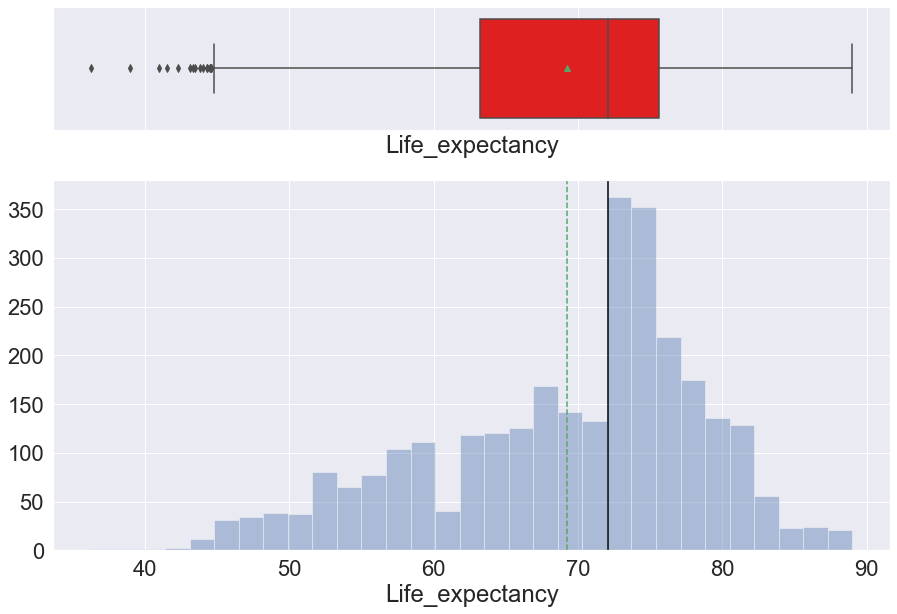

In [ ]:

histogram_boxplot(df.Life_expectancy)

**Observation**

- Life expectancy is left skewed which means some countries have life expectancy less than 45 years
- Mean life expectancy is around 70 years




### lets us explore per capita Alcohol consumption

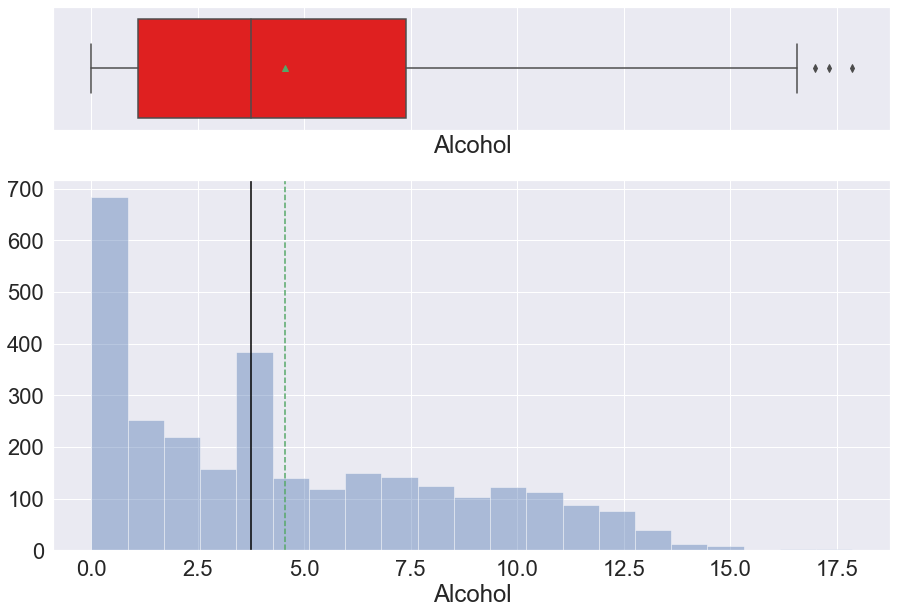

In [ ]:

histogram_boxplot(df.Alcohol)

* The average alcohol consumption is 3.75 liter
* There are some outliers in which average alcohol consumption is more than 15 liters
* The distribution is right skewed

## Distribution of each numerical variable.

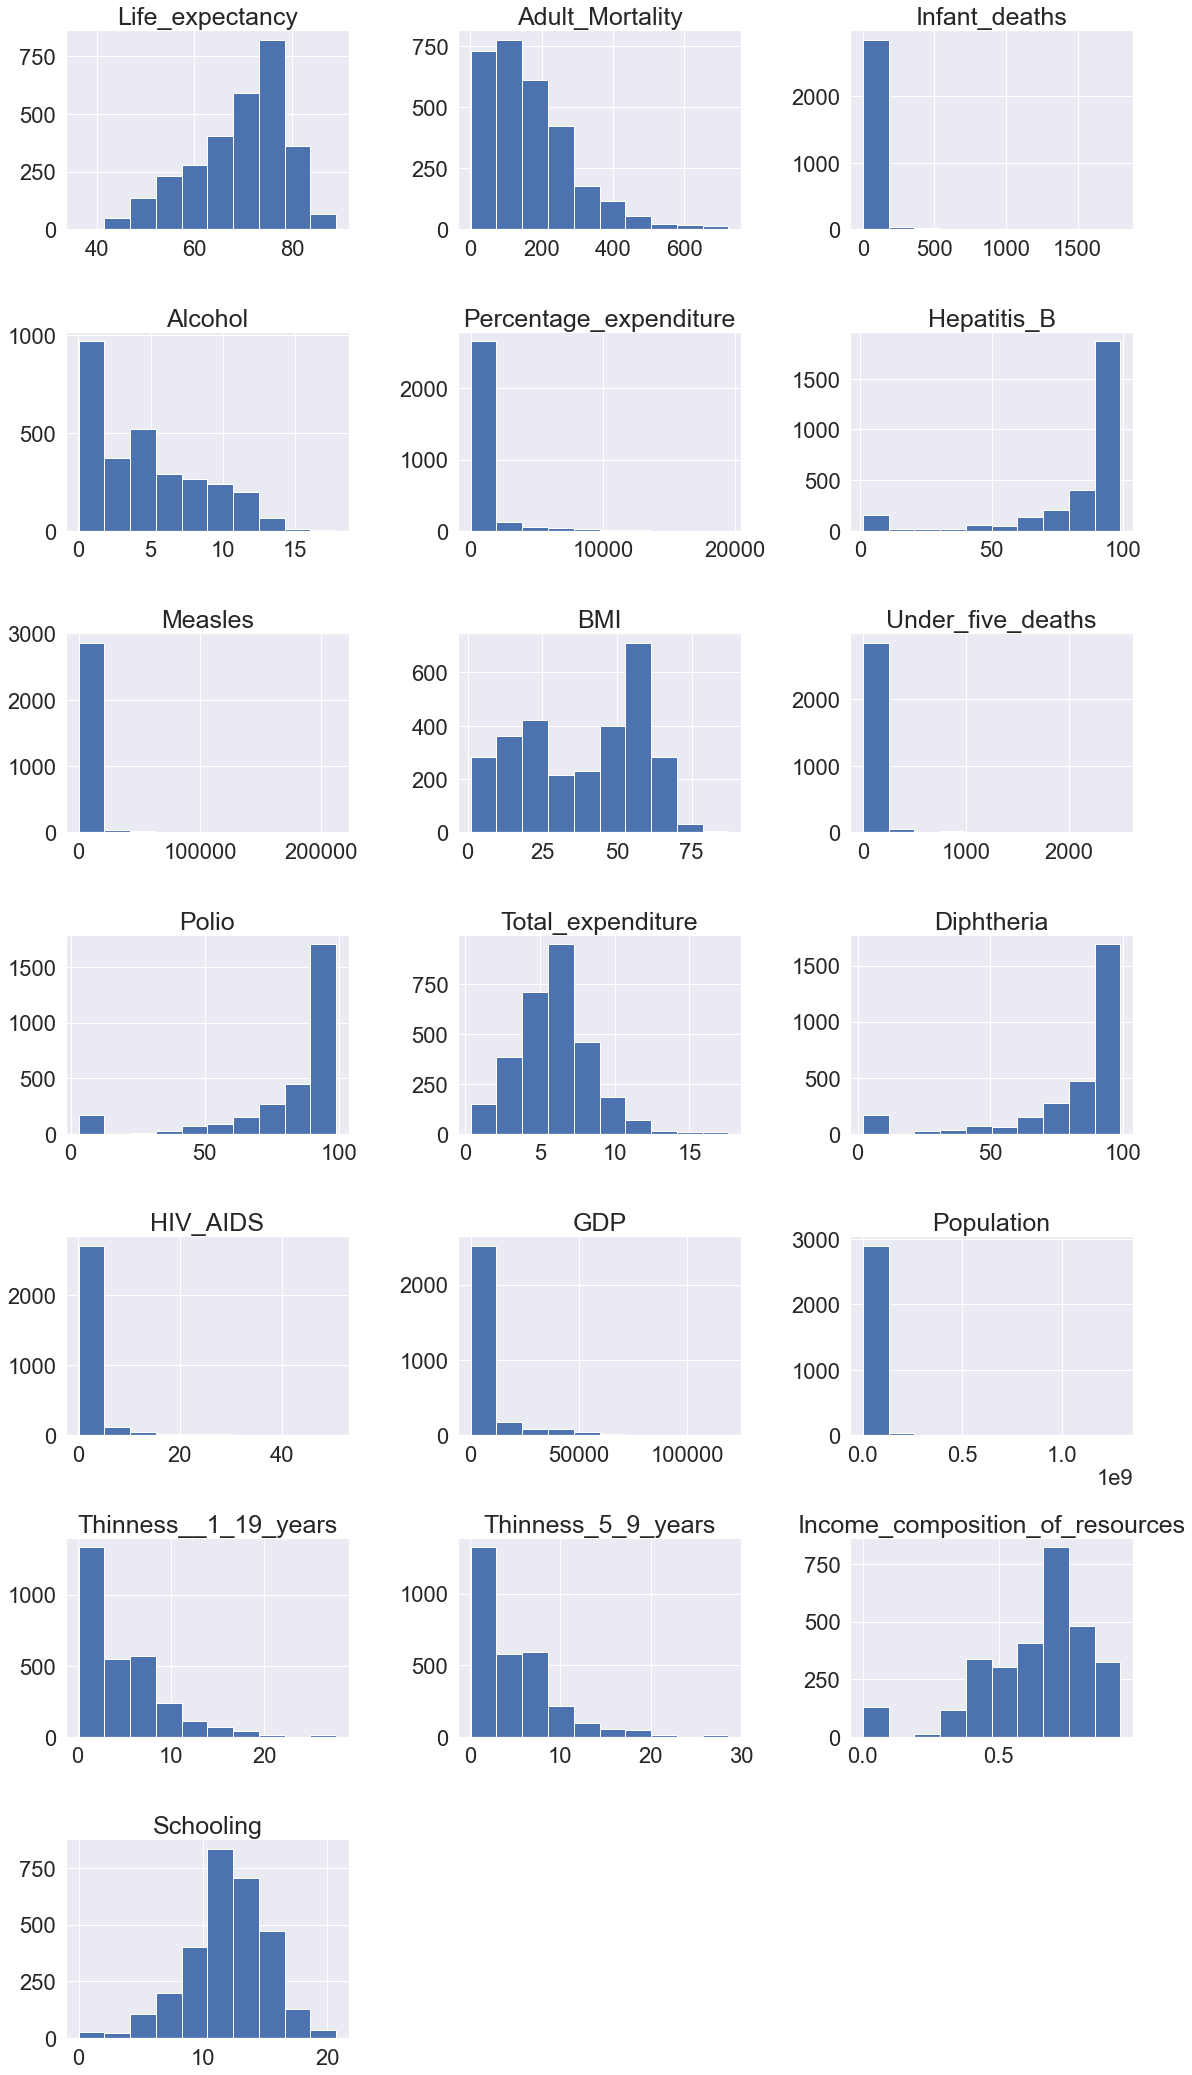

In [ ]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Year')
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

**Observation**
* Total Expenditure and Schooling is somewhat normal distribution
* Hepatitis_B,Diphtheria and Income_composition_of_resources are left skewed and rest are right skewed
* Interpretation of left and right skewed
  -  Adult mortality is right skewed which means that there are some observations where adult mortality is very high (beyond 600). These observations introduces right tail in the distribution, thus making the distribution right skewed
  - Polio is left skewed which means there are some countries where polio immunization is very low which introduces left tail therefore distribution becomes left skewed 

## Lets look at outliers in every numerical column

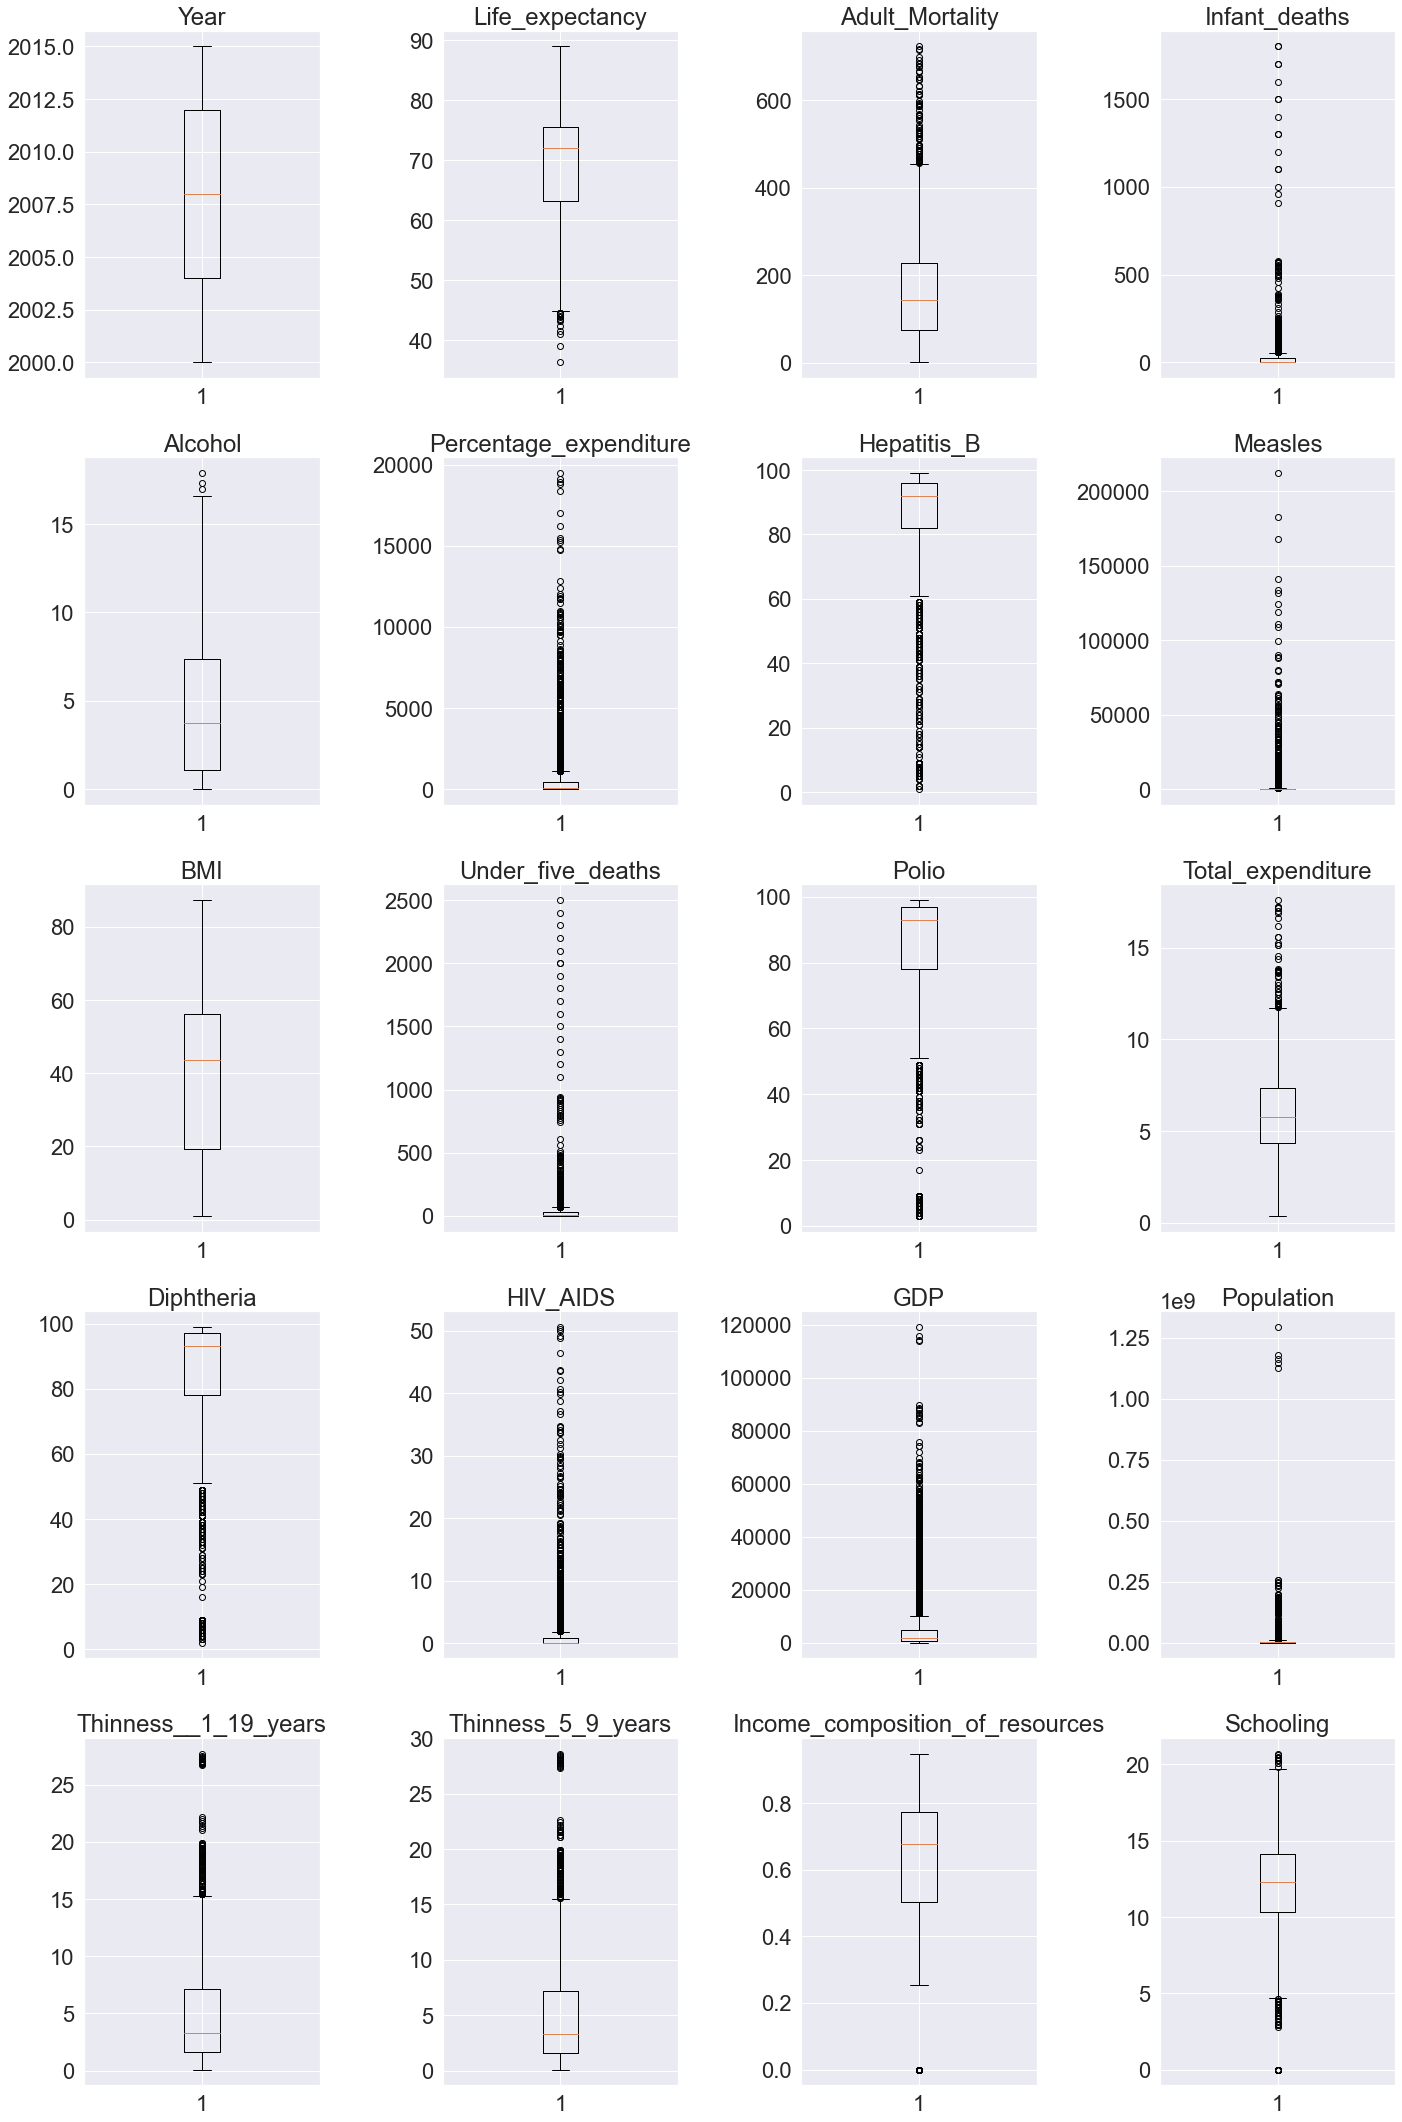

In [ ]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* There are lower outliers in Life_expectancy,Hepatitis_B,Polio,Diphtheria ,Income_composition_of_resources and schooling
* There is no outliers in BMI
* All other numerical columns have upper outliers
* We will treat these outliers as these might adversely affect the predictive power of linear model however in real life these outliers may be due to non-linear pattern in the data set or can be important information. Some time outliers in the independent variable can be adversely impact the linear model, this we can come to know by building model with and with outliers and comparing the model performances.

# Bivaraite Analysis

# Let us first group all countries into continent

In [ ]:
## Lets group coutries into continenets
#! pip install pycountry-convert
import pycountry_convert as pc

def country_to_continent(country_name):
    '''
    country_name : name of country for which continent is needed
    '''
    if '(' in country_name:
        country_name = country_name.split(' ')[0]
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

In [ ]:
df.Country.apply(country_to_continent)

KeyError: "Invalid Country Name: 'Republic of Korea'"

* Above error is arising because names of the countries is different from what library has, so in order to resolve this we looked at all countries names that caused this error and hard coded them as shown below. 

In [ ]:
loc = df.Country.tolist()
continent = dict()
# we are hard coding the continent of those countries which was giving error with country_to_continent function
for cn in loc:
    if cn == 'Republic of Korea':
        continent[cn] = 'Asia'
    elif cn == 'The former Yugoslav republic of Macedonia':
        continent[cn] = 'Europe'
    elif cn == 'Timor-Leste':
        continent[cn] = 'Asia'
    else:
        continent[cn] = country_to_continent(cn)


In [ ]:
# mapping every country to its continent
df['Continent'] = df['Country'].map(continent)

In [ ]:
# let us look at unique continents
print(df['Country'].map(continent).unique())

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']


## Lets look at correlations

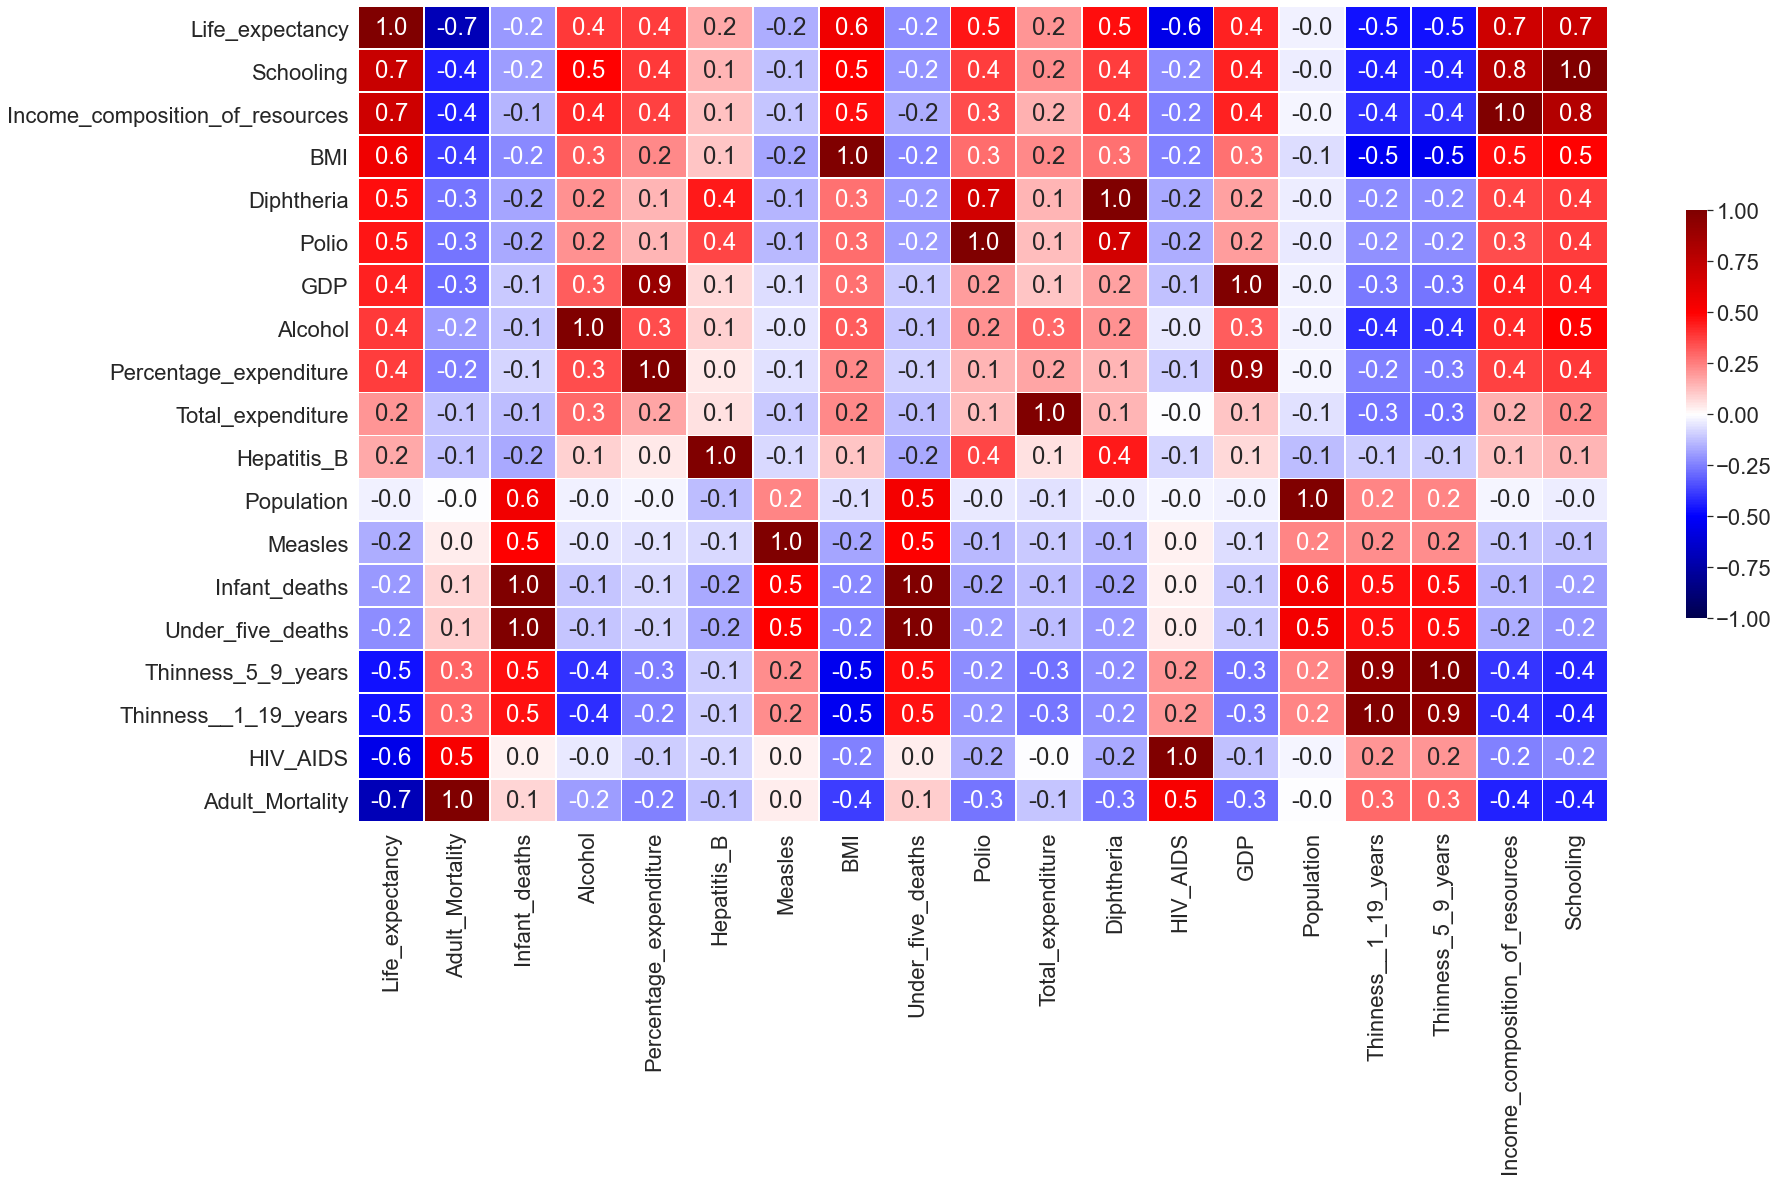

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove('Year') # dropping year column as it is temporal variable
corr = df[numeric_columns].corr().sort_values(by=['Life_expectancy'],ascending=False) # sorting correlations w.r.t life expectancy  


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7, cbar_kws={"shrink": .5});

**Observations**
* Life expectancy is highly negatively correlated with Adult Mortality, HIV AIDs, which means that 
  as adult mortality and HIV death (0-4 years) increases, life expectancy of countries tend to decrease
* Life expectancy is highly positively correlated with Schooling, Income_composition of resources and BMI which means that 
  as schooling years of citizens in a country , income composition of resources and bmi increases life expectancy tend to         increase 


## Let us look at the graph of those variables that are highly correlated with life expectancy

### Life expectancy vs Hiv_Aids vs Status

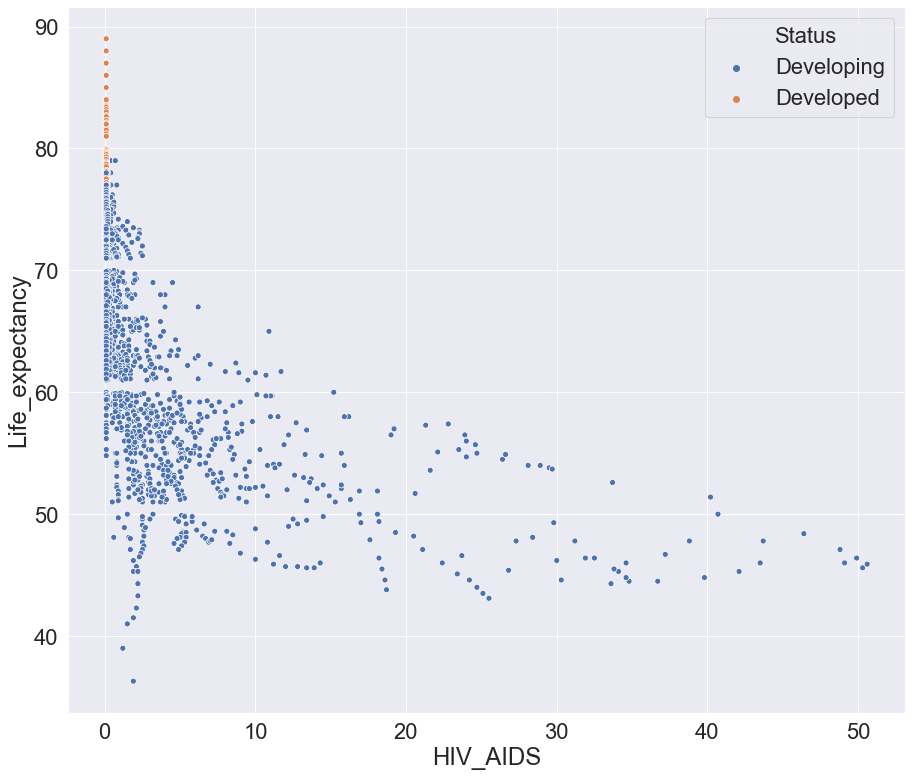

In [ ]:
# Lets look visualize the relationship 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='HIV_AIDS', hue='Status', data=df);

* developed countries have very low cases of HIV AIDs

### Life expectancy vs hiv_ Aids vs Continent

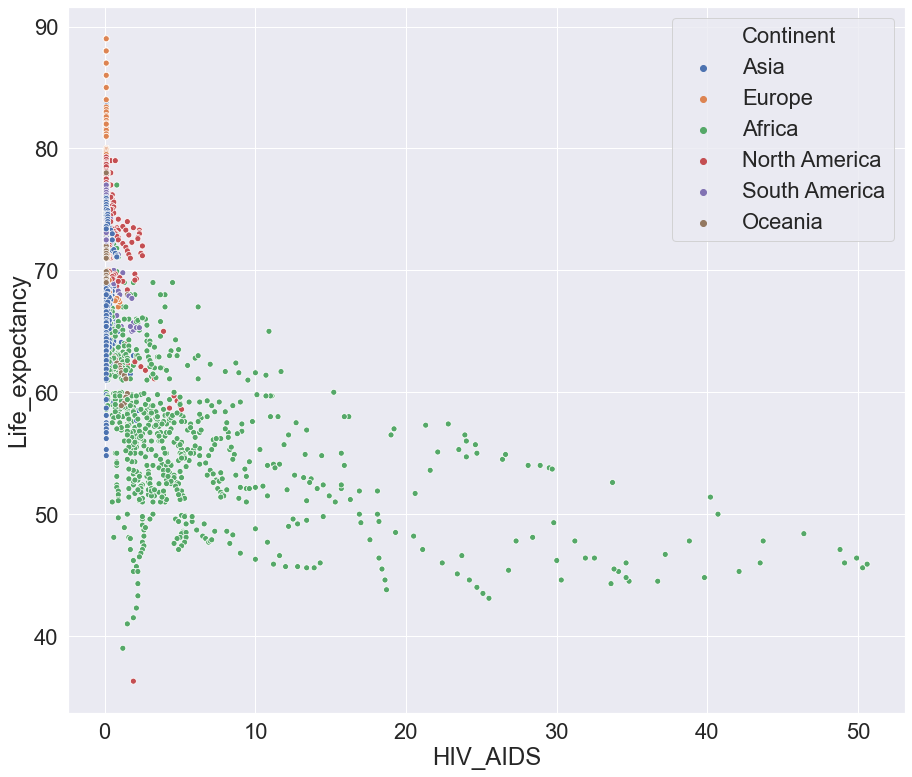

In [ ]:

plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='HIV_AIDS', hue='Continent', data=df);

* African countries have high HIV AIDs cases 
* There is one north American country whose life expectancy is very low once and HIV AIDS death is very low, lets look at it

In [ ]:
df[(df.Life_expectancy <40)& (df.HIV_AIDS<10) & (df.Continent =='North America')]

Country  Year      Status  Life_expectancy  Adult_Mortality  \
1127   Haiti  2010  Developing           36.300          682.000   

      Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  \
1127             23    5.760                  36.293       92.000        0   

      ...  Total_expenditure  Diphtheria  HIV_AIDS     GDP  Population  \
1127  ...              8.900      66.000     1.900 662.280 9999617.000   

      Thinness__1_19_years  Thinness_5_9_years  \
1127                 4.000               4.000   

      Income_composition_of_resources  Schooling      Continent  
1127                            0.470      8.600  North America  

[1 rows x 23 columns]

* Haiti is only the North American Country whose life expectancy is very low that is 36.300 in the year 2010. This can be investigated further.

### Life expectancy vs Adult Mortality vs Status

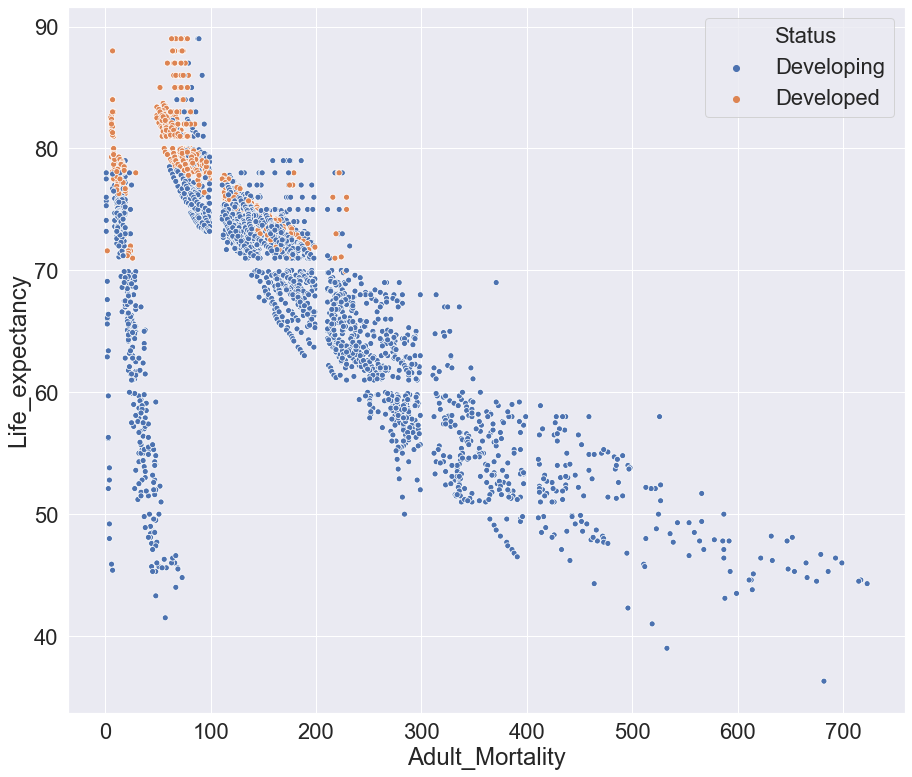

In [ ]:
# Lets look at these relationship in graph
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Adult_Mortality', hue='Status', data=df);

* Developed country have lower Adult Mortality

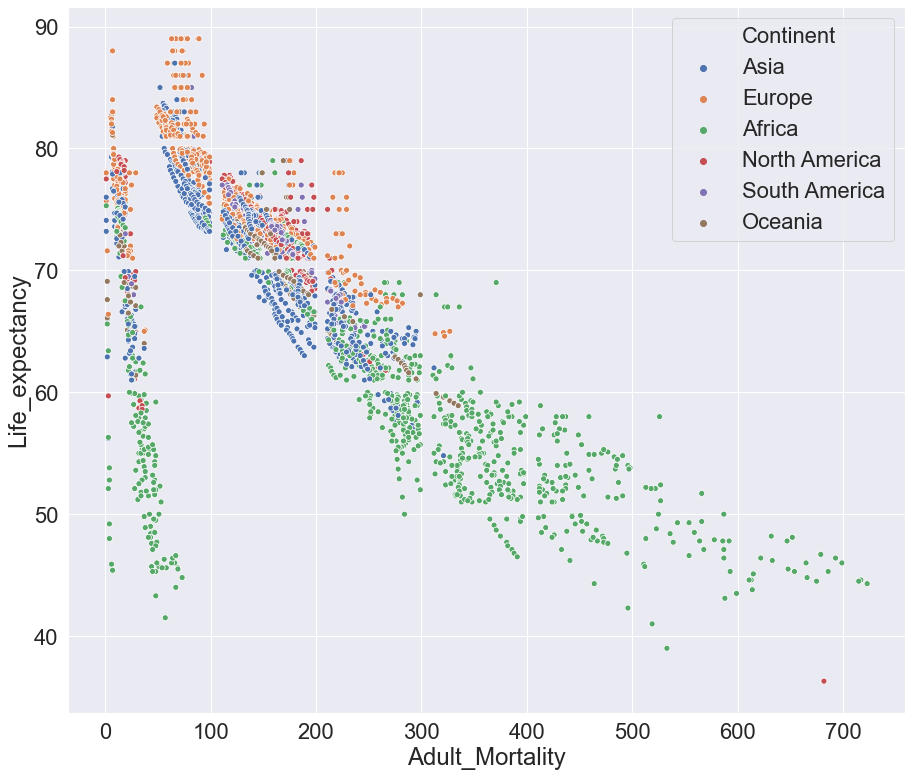

In [ ]:
# Lets look at these relationship in graph
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Adult_Mortality', hue='Continent', data=df);

* Some Asian countries have life expectancy higher than 80 years, lets look at them
* Most of African countries have higher adult mortality and life expectancy lower than 65 years

In [ ]:
print(df[(df.Continent == 'Asia') & (df.Life_expectancy > 80)]['Country'].unique())

['Cyprus' 'Israel' 'Japan' 'Republic of Korea' 'Singapore']


* Japan, Cyprus, Israel, Japan, Republic of Korea, Singapore are developed country of Asia and their life expectancy is higher than 80 years

### Life_expectancy vs Schooling vs Status

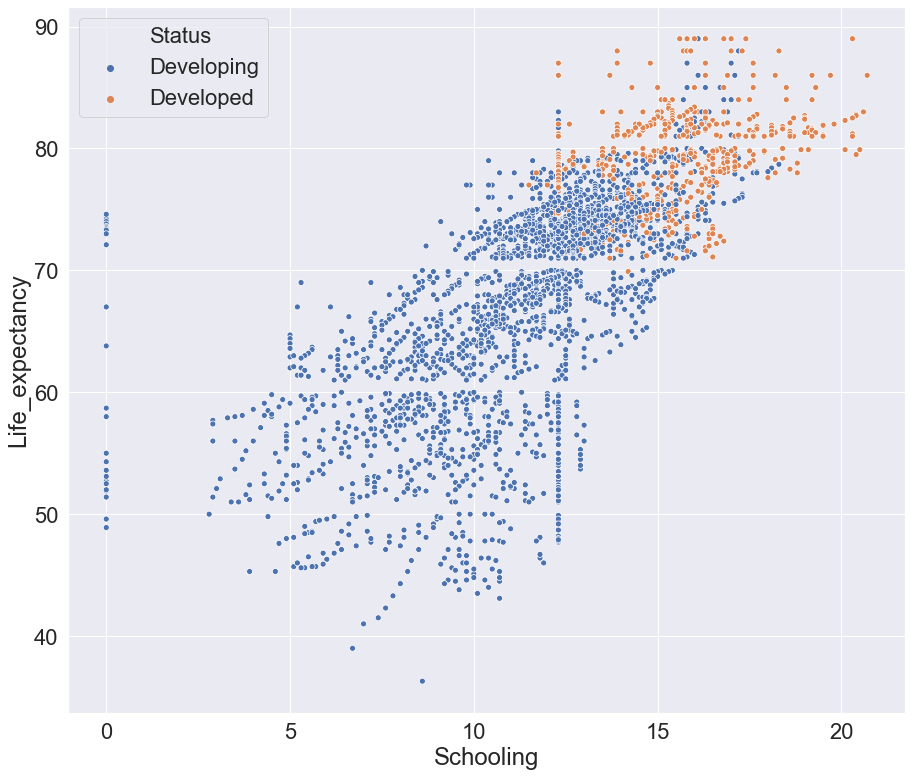

In [ ]:
# Lets look at these relationship in graph
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Schooling', hue='Status', data=df);

* Majority of Developed countries have schooling of more than 13 years
* Developing countries have higher variance in schooling years

## Life_expectancy vs Schooling vs Continent

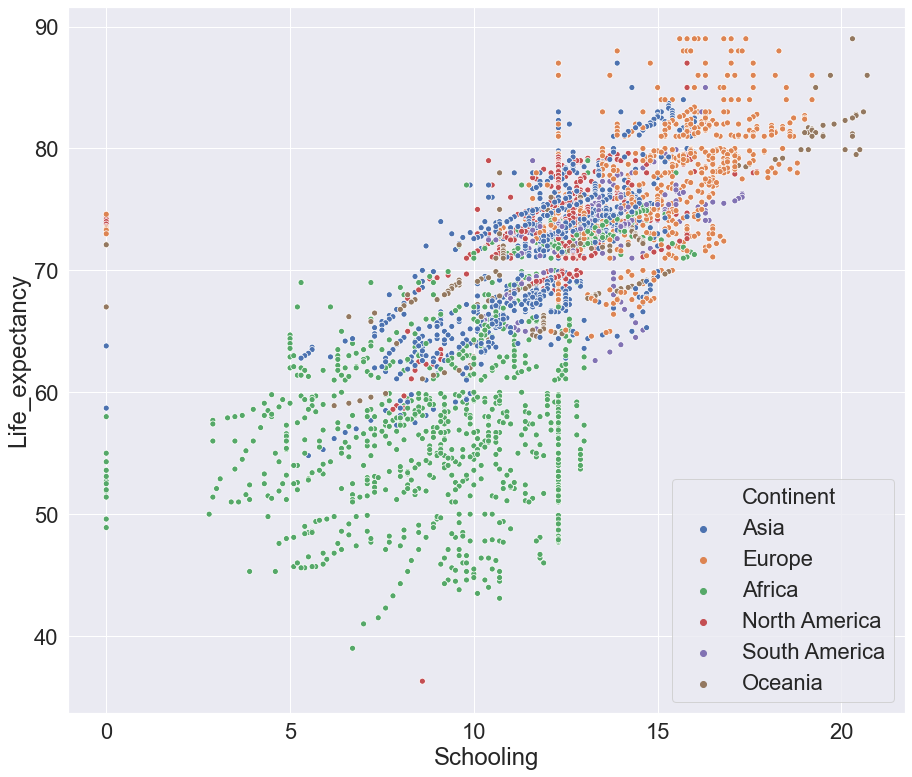

In [ ]:
# Lets look at these relationship in graph
plt.figure(figsize=(15,13))
sns.scatterplot(y='Life_expectancy', x='Schooling', hue='Continent', data=df);

* Majority of Europian countries ,  Some of Oceania countries have schooling years more than 15 years
* African countries have lower Schooling years
* Some observation have 0 schooling years which we can explore further

## Life_expectancy vs Income_composition_of_resources vs Status

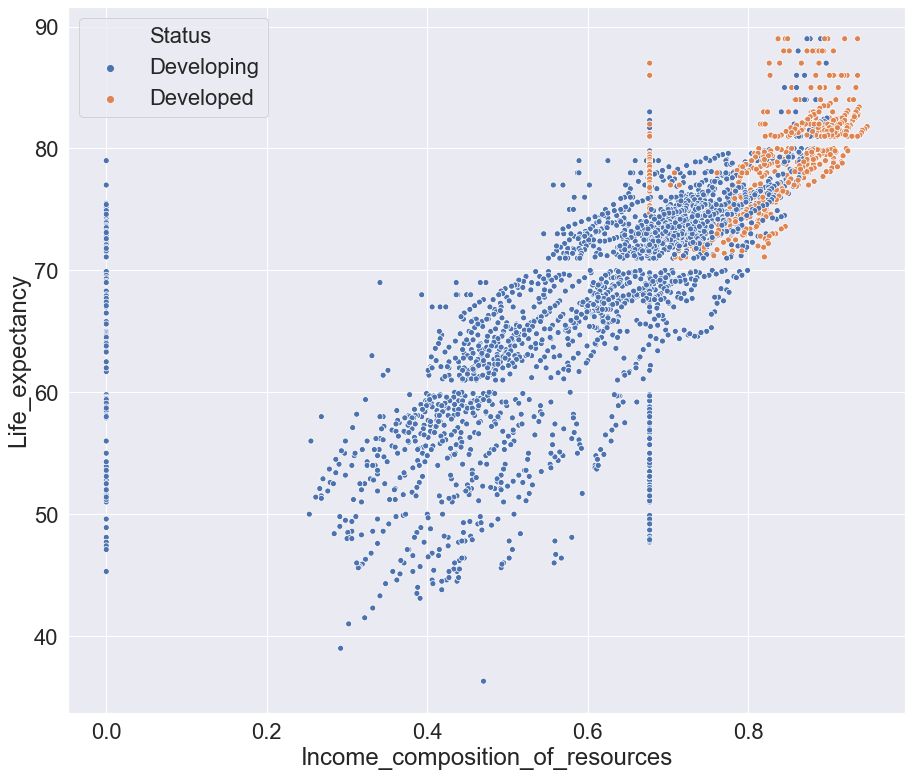

In [ ]:
#
plt.figure(figsize=(15,13))

sns.scatterplot(y='Life_expectancy', x='Income_composition_of_resources', hue='Status', data=df);

* Developed countries have higher Income composition of resources

## Life_expectancy vs Income_composition_of_resources vs Continent

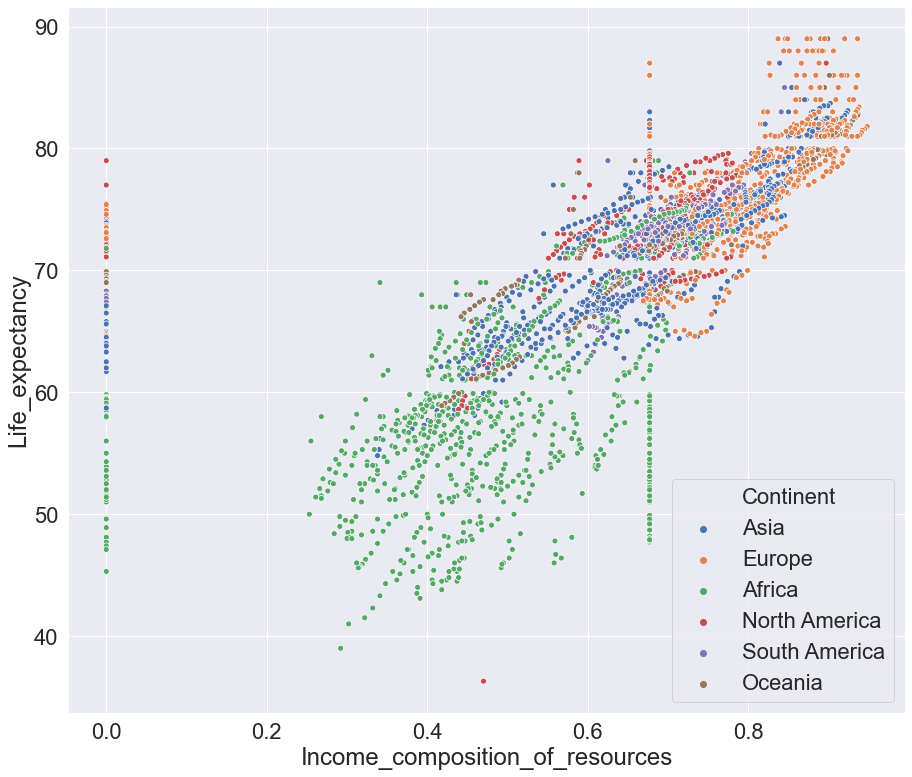

In [ ]:
#
plt.figure(figsize=(15,13))

sns.scatterplot(y='Life_expectancy', x='Income_composition_of_resources', hue='Continent', data=df);

* African countries having lower life expectancy have low income composition of resources

## Year vs Life Expecatncy

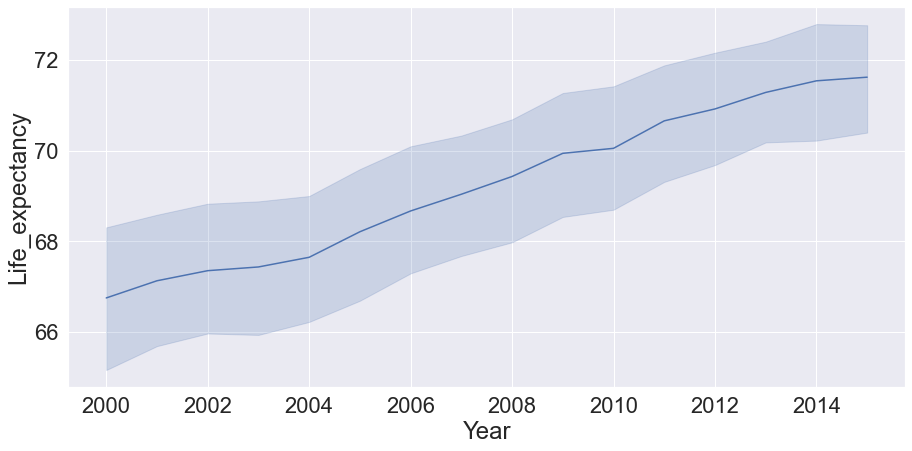

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Life_expectancy',
             data=df);


* Overall life expectancy of the world population is increasing  with time ( years )

## Year vs Life_expectancy vs Status

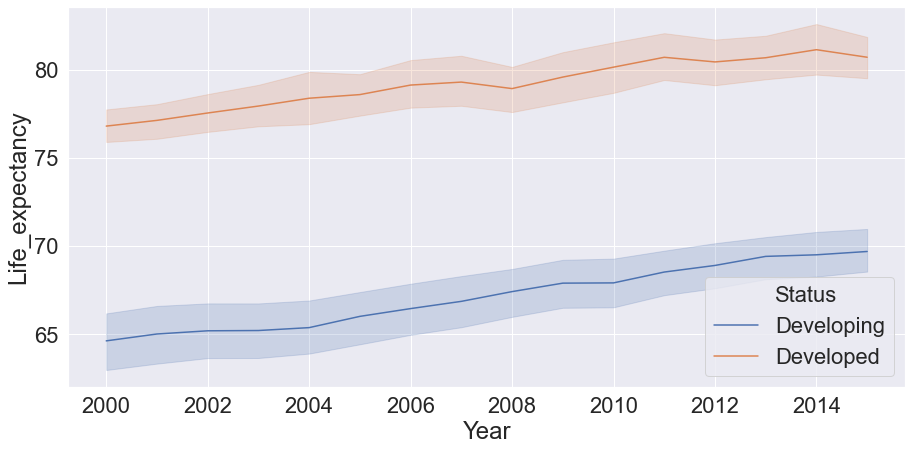

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Life_expectancy',hue='Status',
             data=df);

* In both developing countries and developed countries life expectancy has been increasing over the years
* Developing countries have lower life expectancy than developed countries

## Year vs Life_expectancy vs Continent

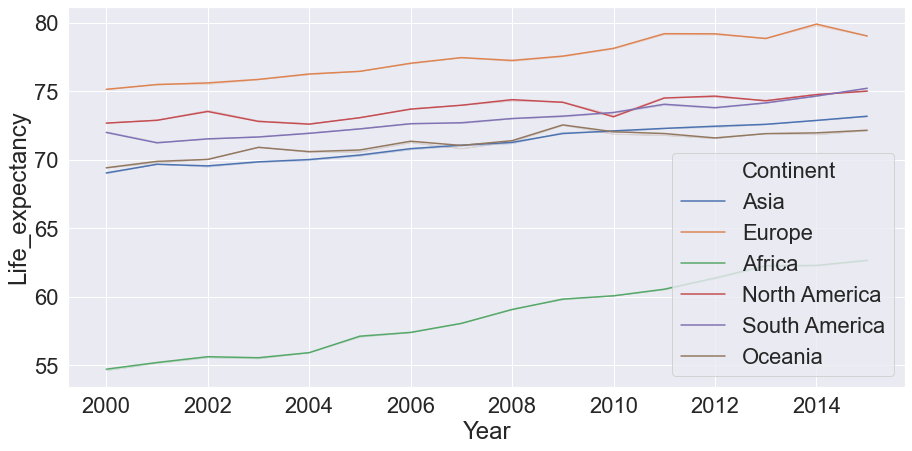

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Life_expectancy',hue='Continent',ci=0,
             data=df);

* African countries have lower life expectancy than other countries but its slope of increase in life expectancy is higher than all other continents

# Year vs Infant_deaths vs Continent

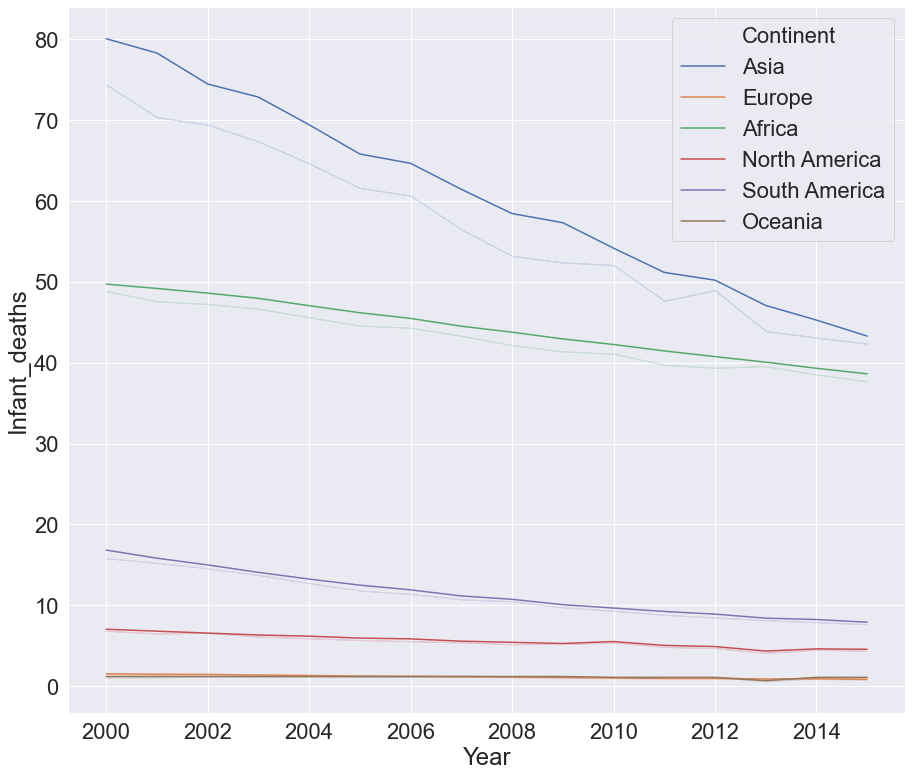

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,13))
sns.lineplot(x='Year', y='Infant_deaths',hue='Continent',ci=0,
             data=df);

* Asian Countries have witnessed sharp decline in infants deaths
* In African countries also infants death have decreased over the years
* European , North American and Oceanic countries already had very lower infants deaths

## Year vs Schooling vs Status

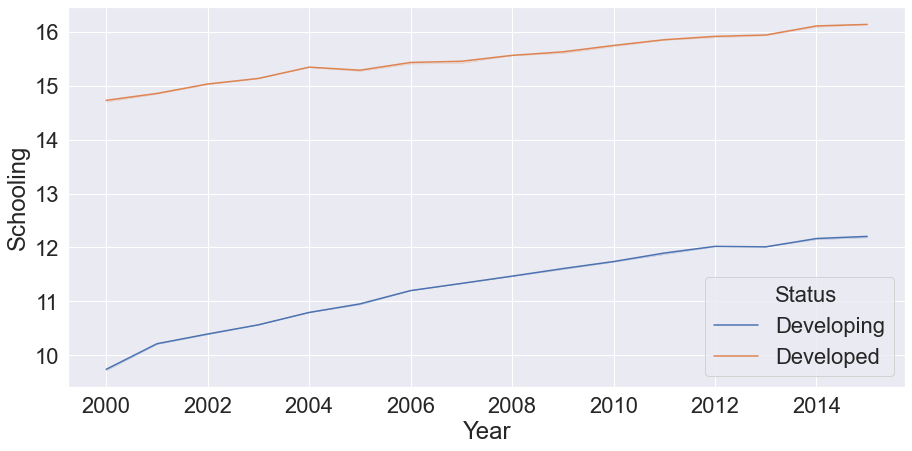

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Schooling',hue='Status',ci=0,
             data=df);

* Schooling years of citizens in both developed and developing countries have increased over the years

## Year vs Schooling vs Continent

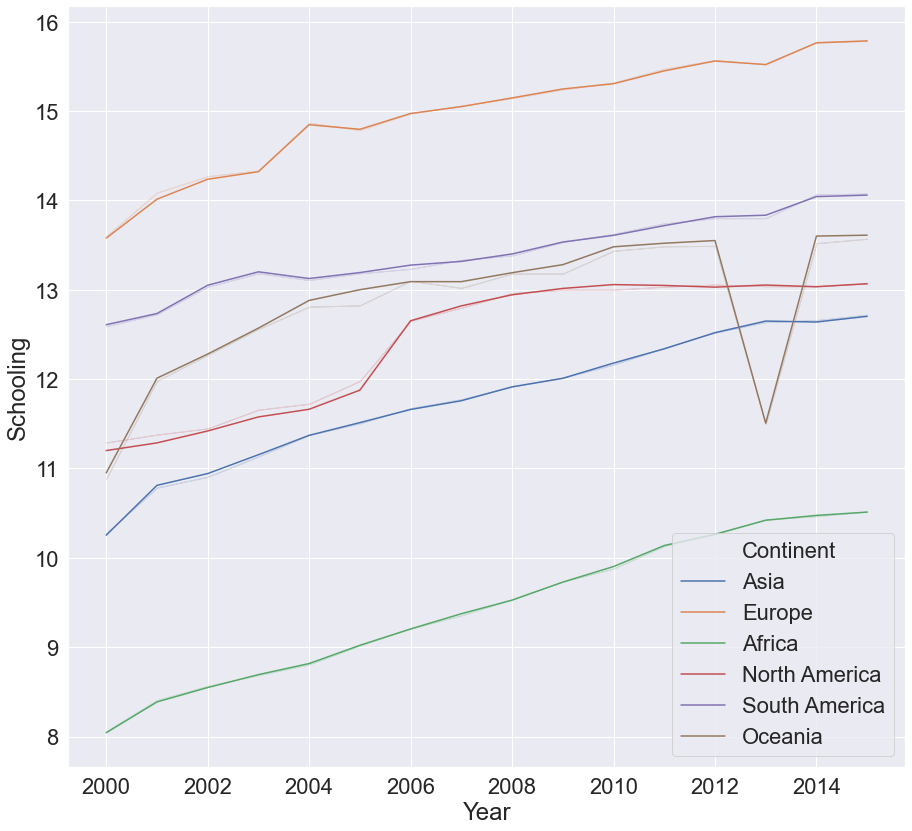

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,14))
sns.lineplot(x='Year', y='Schooling',hue='Continent',ci=0,
             data=df);

* In all continents , Schooling years has been increasing over the years
* The Oceania countries have witnessed sudden downfall and increase in schooling years from 2012 to 2014 which can be explored further
* Increase in schooling years in African countries has been more than other continents

## Year vs HIV_AIDS vs Continent

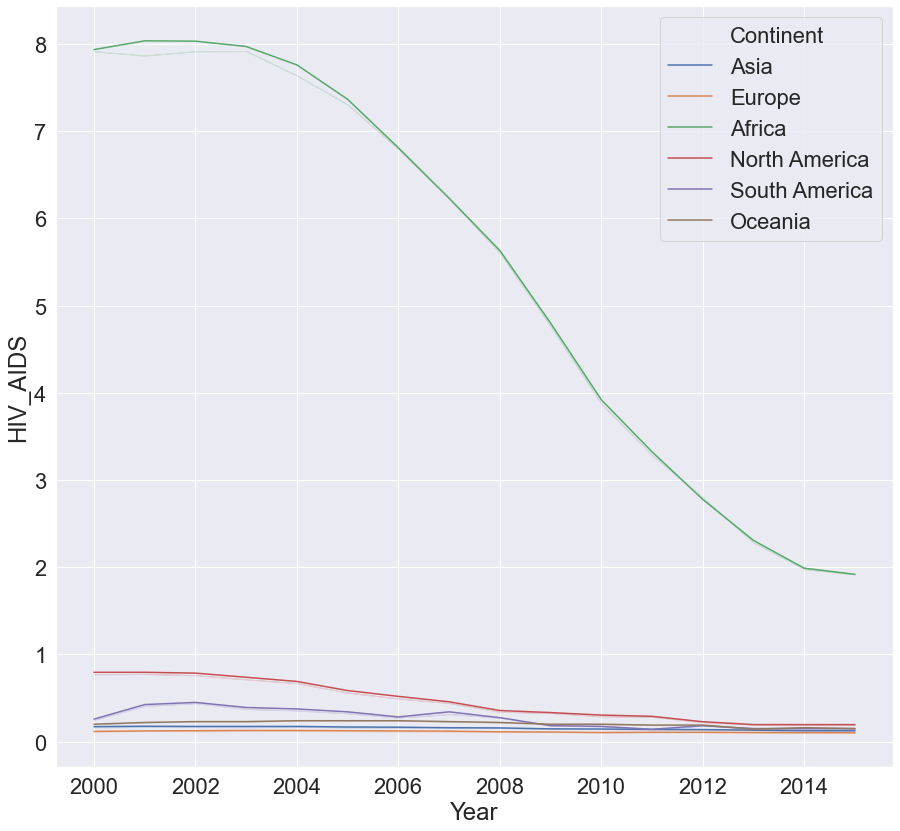

In [ ]:
# How does life expectancy vary year by year
plt.figure(figsize=(15,14))
sns.lineplot(x='Year', y='HIV_AIDS',hue='Continent',ci=0,
             data=df);

* There is sharp decline in HIV Aids deaths in African countries

## Life expectancy of countries vs staus

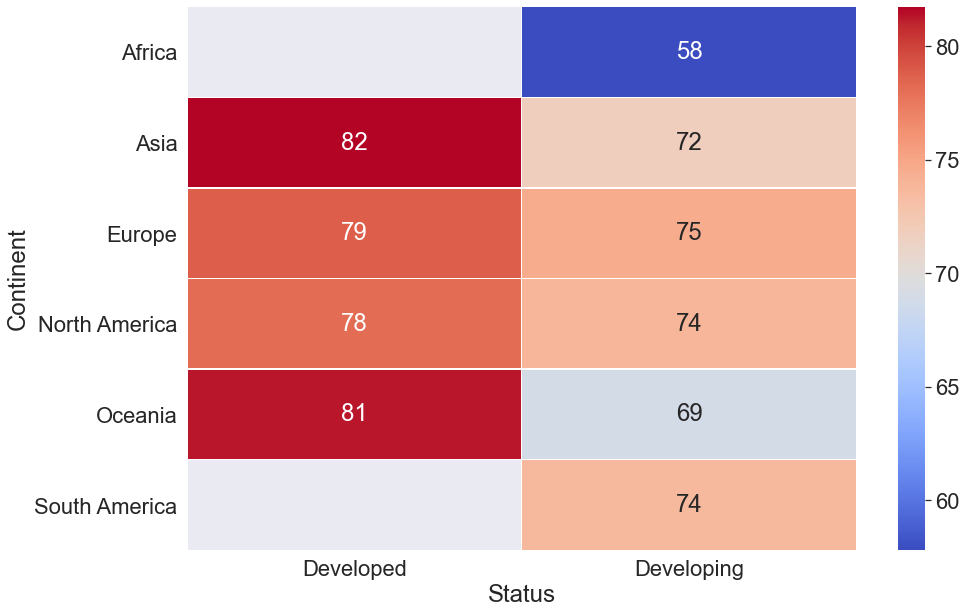

In [ ]:
df_hm =df.pivot_table(index = 'Continent',columns ='Status',values ="Life_expectancy",aggfunc=np.median)
# Draw a heatmap 
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_hm,   cmap='coolwarm',linewidths=.5, annot=True, ax=ax);

**Observation**

- Developed countries from Asia has higher life expectancy than developed countries from Europe and North America


## Life_expectancy vs Continent vs Status

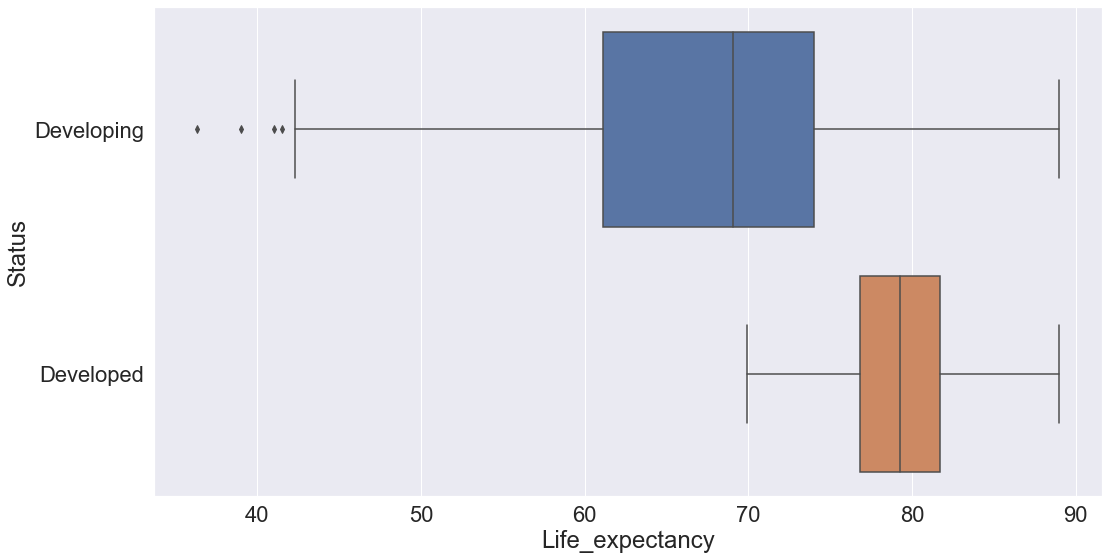

In [ ]:
plt.figure(figsize=(17,9))
sns.boxplot(y='Status',x="Life_expectancy",data=df)
plt.show()

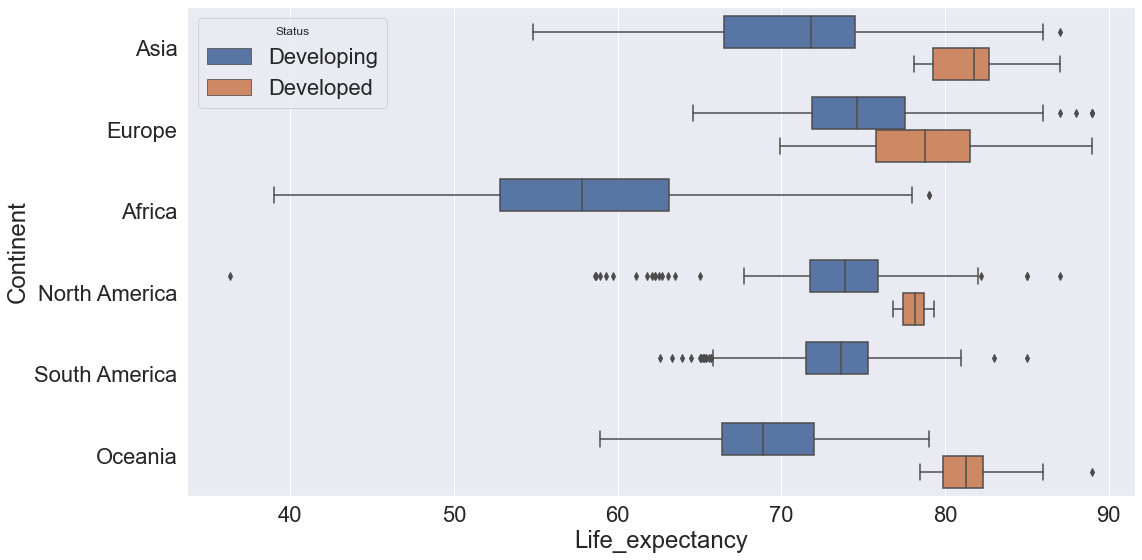

In [ ]:
plt.figure(figsize=(17,9))
sns.boxplot(y="Continent",x="Life_expectancy",data=df,hue='Status')
plt.show()

** Observation**

- The life expectancy in the developed countries is much higher than the developing countries.
- The median value of life expectancy (approximately as can be seen from the boxplot) for:
     - Developing: 69 years
     - Developed: 78 years
- Asian developed countries have life expectancy higher than European and north American developed countries


# Data Preparation

## Fix data type

In [ ]:
# Converting object type column to category type
df['Country'] = df['Country'].astype('category')
df['Status'] = df['Status'].astype('category')
df['Continent'] = df['Continent'].astype('category')

## Outliers Treatment

In [ ]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

### Treating the outiers

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df,numerical_col)

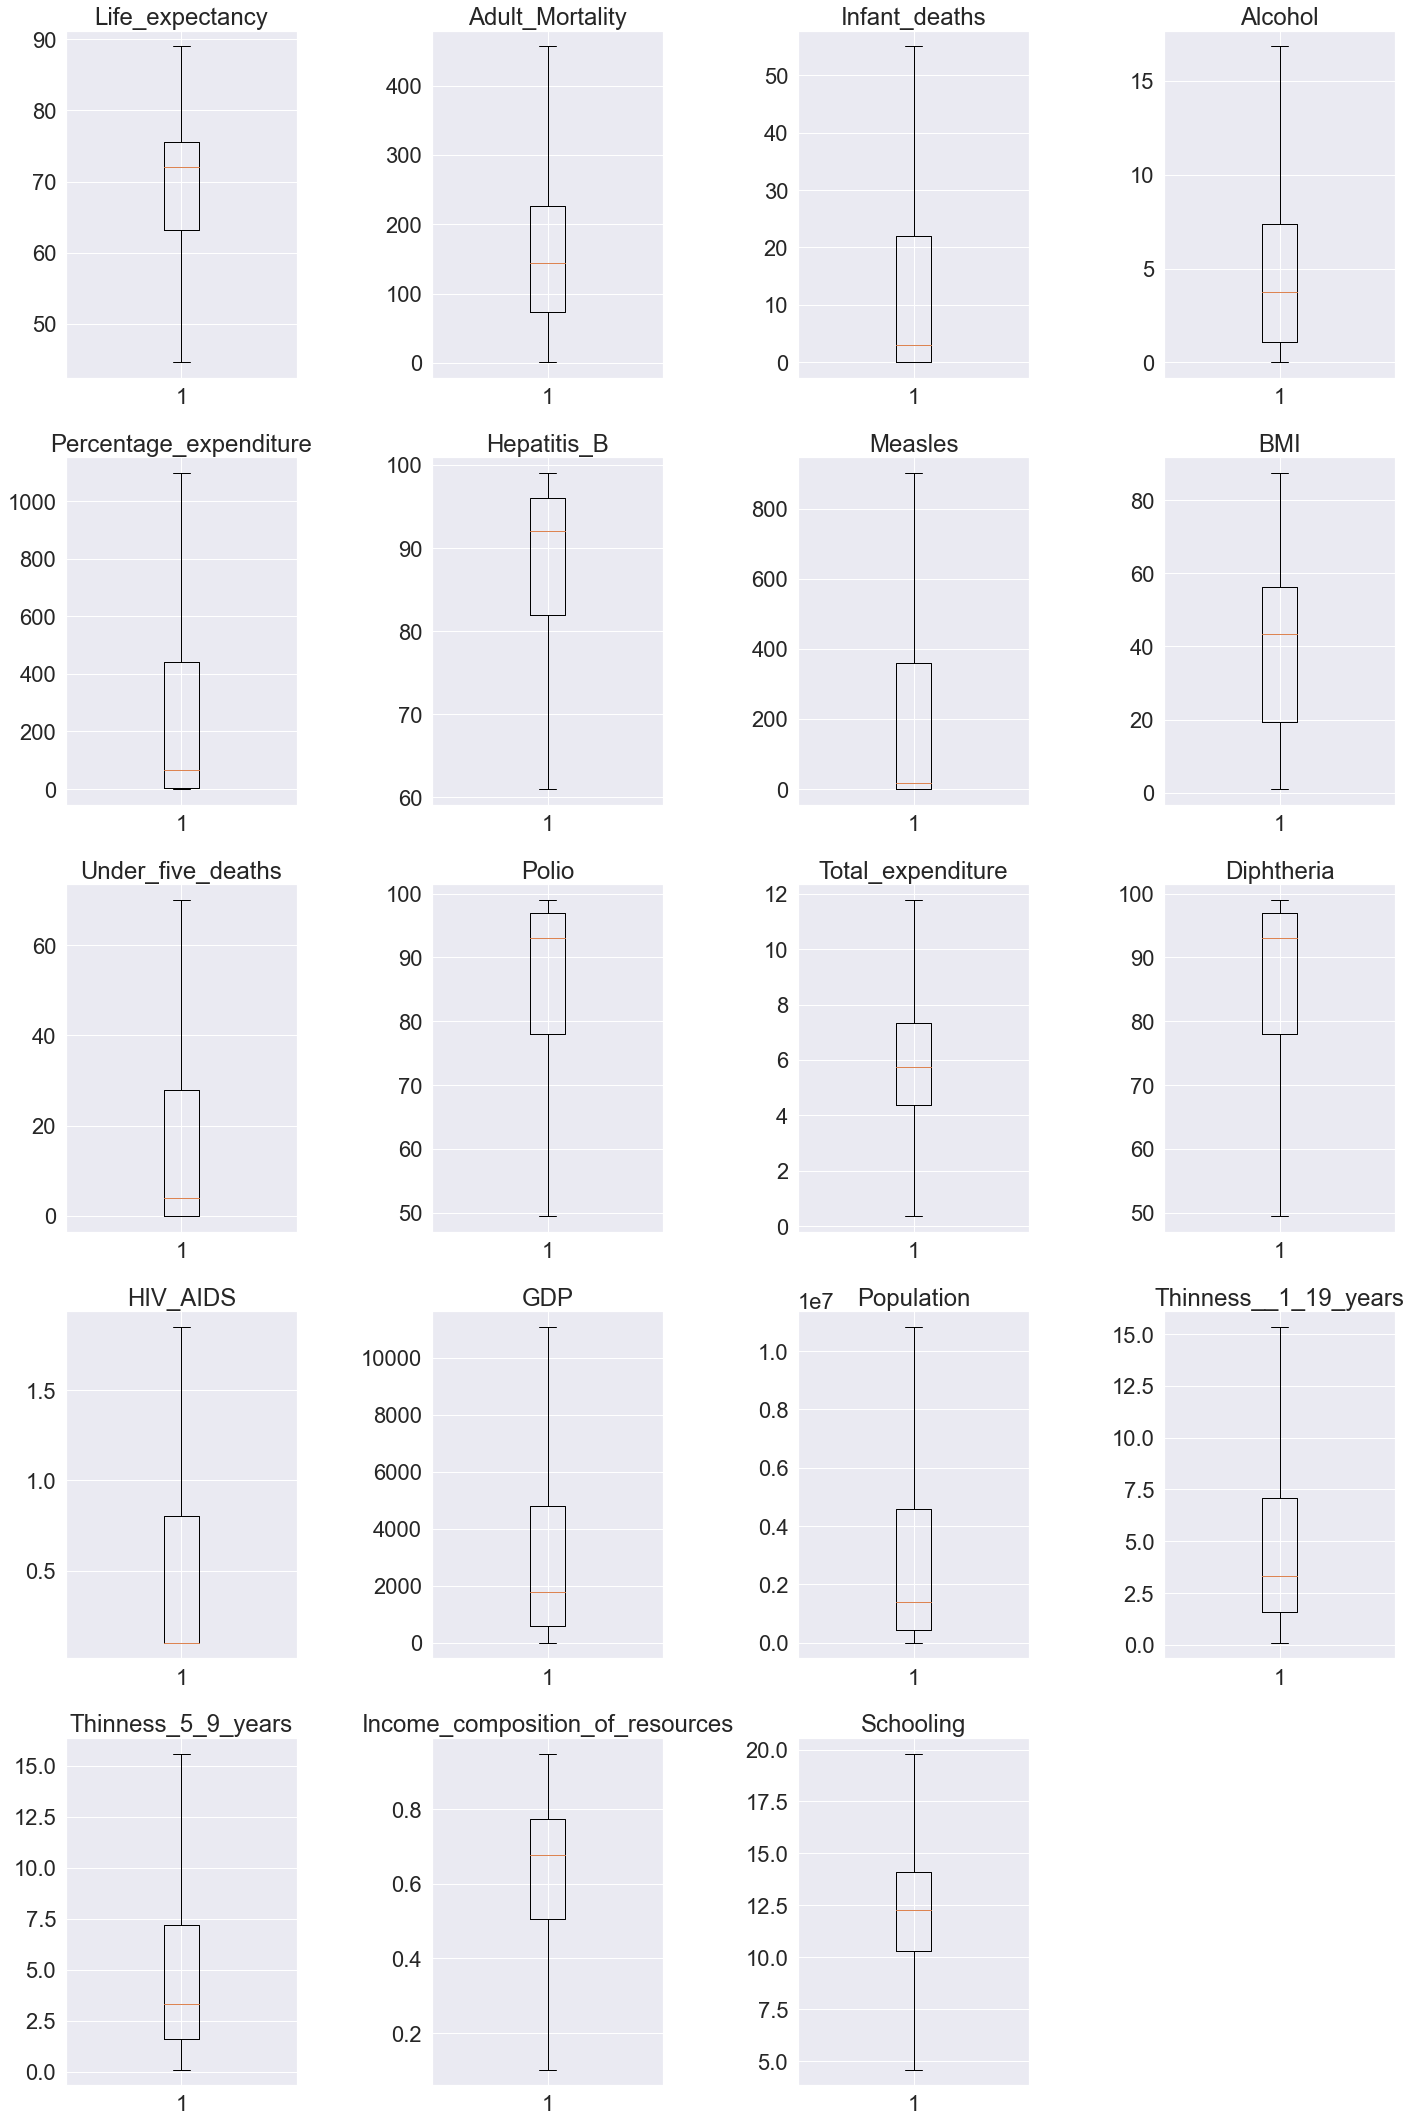

In [ ]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

* Outliers has been treated

# Model Building

In [ ]:
df.head()

Country  Year      Status  Life_expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing           65.000          263.000   
1  Afghanistan  2014  Developing           59.900          271.000   
2  Afghanistan  2013  Developing           59.900          268.000   
3  Afghanistan  2012  Developing           59.500          272.000   
4  Afghanistan  2011  Developing           59.200          275.000   

   Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  ...  \
0             55    0.010                  71.280       65.000  900.625  ...   
1             55    0.010                  73.524       62.000  492.000  ...   
2             55    0.010                  73.219       64.000  430.000  ...   
3             55    0.010                  78.184       67.000  900.625  ...   
4             55    0.010                   7.097       68.000  900.625  ...   

   Total_expenditure  Diphtheria  HIV_AIDS     GDP   Population  \
0              8.160      65.000     0.100 584.259 10832552.250   
1              8.180      62.000     0.100 612.697   327582.000   
2              8.130      64.000     0.100 631.745 10832552.250   
3              8.520      67.000     0.100 669.959  3696958.000   
4              7.870      68.000     0.100  63.537  2978599.000   

   Thinness__1_19_years  Thinness_5_9_years  Income_composition_of_resources  \
0                15.350              15.600                            0.479   
1                15.350              15.600                            0.476   
2                15.350              15.600                            0.470   
3                15.350              15.600                            0.463   
4                15.350              15.600                            0.454   

   Schooling  Continent  
0     10.100       Asia  
1     10.000       Asia  
2      9.900       Asia  
3      9.800       Asia  
4      9.500       Asia  

[5 rows x 23 columns]

In [ ]:
#Defining X and y variables
X = df.drop(['Life_expectancy','Country'], axis=1)
y = df[['Life_expectancy']]

print(X.head())
print(y.head())

   Year      Status  Adult_Mortality  Infant_deaths  Alcohol  \
0  2015  Developing          263.000             55    0.010   
1  2014  Developing          271.000             55    0.010   
2  2013  Developing          268.000             55    0.010   
3  2012  Developing          272.000             55    0.010   
4  2011  Developing          275.000             55    0.010   

   Percentage_expenditure  Hepatitis_B  Measles    BMI  Under_five_deaths  \
0                  71.280       65.000  900.625 19.100                 70   
1                  73.524       62.000  492.000 18.600                 70   
2                  73.219       64.000  430.000 18.100                 70   
3                  78.184       67.000  900.625 17.600                 70   
4                   7.097       68.000  900.625 17.200                 70   

   ...  Total_expenditure  Diphtheria  HIV_AIDS     GDP   Population  \
0  ...              8.160      65.000     0.100 584.259 10832552.250   
1  ...  

In [ ]:
print(X.shape)
print(y.shape)

(2938, 21)
(2938, 1)


## Create Dummy Variables
Values like 'Europe' cannot be read into an equation. Using substitutes like 1 for Continent_Asia , 2 for Continent_Europe and so on would end up implying that continent_europe have more importance than Continent asia! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this person from Europe?", "Is this person American?" and so on. These will be used as independent variables without imposing any kind of ordering between the three regions.




In [ ]:
X = pd.get_dummies(X, columns=['Continent', 'Status'], drop_first=True)
X.head()

Year  Adult_Mortality  Infant_deaths  Alcohol  Percentage_expenditure  \
0  2015          263.000             55    0.010                  71.280   
1  2014          271.000             55    0.010                  73.524   
2  2013          268.000             55    0.010                  73.219   
3  2012          272.000             55    0.010                  78.184   
4  2011          275.000             55    0.010                   7.097   

   Hepatitis_B  Measles    BMI  Under_five_deaths  Polio  ...  \
0       65.000  900.625 19.100                 70 49.500  ...   
1       62.000  492.000 18.600                 70 58.000  ...   
2       64.000  430.000 18.100                 70 62.000  ...   
3       67.000  900.625 17.600                 70 67.000  ...   
4       68.000  900.625 17.200                 70 68.000  ...   

   Thinness__1_19_years  Thinness_5_9_years  Income_composition_of_resources  \
0                15.350              15.600                            0.479   
1                15.350              15.600                            0.476   
2                15.350              15.600                            0.470   
3                15.350              15.600                            0.463   
4                15.350              15.600                            0.454   

   Schooling  Continent_Asia  Continent_Europe  Continent_North America  \
0     10.100               1                 0                        0   
1     10.000               1                 0                        0   
2      9.900               1                 0                        0   
3      9.800               1                 0                        0   
4      9.500               1                 0                        0   

   Continent_Oceania  Continent_South America  Status_Developing  
0                  0                        0                  1  
1                  0                        0                  1  
2                  0                        0                  1  
3                  0                        0                  1  
4                  0                        0                  1  

[5 rows x 25 columns]

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

Year  Adult_Mortality  Infant_deaths  Alcohol  Percentage_expenditure  \
1641  2008           64.000              0    7.140                1096.807   
618   2005          394.000              8    2.030                   0.000   
406   2009          283.000             44    4.550                  81.143   
1094  2011          289.000              4    3.570                  40.454   
1788  2007          217.000             55    0.260                   0.531   

      Hepatitis_B  Measles    BMI  Under_five_deaths  Polio  ...  \
1641       86.000    1.000 66.600                  0 72.000  ...   
618        92.000  146.000 21.700                 13 62.000  ...   
406        92.000  900.625 16.100                 70 91.000  ...   
1094       86.000    0.000 23.700                  7 85.000  ...   
1788       85.000  900.625 17.600                 70 84.000  ...   

      Thinness__1_19_years  Thinness_5_9_years  \
1641                 0.700               0.700   
618                  8.800               8.500   
406                  9.300               8.800   
1094                 7.800               7.700   
1788                13.200              13.500   

      Income_composition_of_resources  Schooling  Continent_Asia  \
1641                            0.813     14.600               0   
618                             0.496      9.400               0   
406                             0.356      5.900               0   
1094                            0.410      9.000               0   
1788                            0.484      8.100               1   

      Continent_Europe  Continent_North America  Continent_Oceania  \
1641                 1                        0                  0   
618                  0                        0                  0   
406                  0                        0                  0   
1094                 0                        0                  0   
1788                 0                        0                  0   

      Continent_South America  Status_Developing  
1641                        0                  0  
618                         0                  1  
406                         0                  1  
1094                        0                  1  
1788                        0                  1  

[5 rows x 25 columns]

# Choose Model, Train and Evaluate

In [ ]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)                              

Intercept of the linear equation: [-171.44779225]

COefficients of the equation are: [[ 1.18300131e-01 -1.44447523e-02  2.50296290e-01 -1.01752078e-01
   2.09300589e-03 -3.26322210e-02  2.10060197e-04  8.13446735e-04
  -2.42252292e-01  2.41299365e-02 -1.46884834e-02  4.02805662e-02
  -4.32104006e+00 -5.39483355e-05  5.16250396e-08  2.76353088e-02
  -1.14672076e-01  7.16496967e+00  2.59040593e-01  1.43863467e+00
   1.75135940e+00  4.20906345e+00  1.96601543e-01  2.36222852e+00
  -3.14859198e+00]]


## lets look at model performances

In [ ]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)


2.576023049608894

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [ ]:
# RMSE on test data
mean_squared_error(y_test, pred)**0.5

3.4017407992401902

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [ ]:
# R2 Squared: on test
r2_score(y_test, pred)

0.8752077848398535

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- R^2 value is 0.87 which means that in this model independent variables are able to explain 87% of variances in dependent variable

# Conclusion

- The Training and testing scores are around 87% and both scores are comparable, hence the model is a good fit.

- R2_score is 0.87, that explains 87% of total variation in the dataset. So, overall the model is very satisfactory.

# Add-on: **statsmodels**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [ ]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     502.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:05   Log-Likelihood:                -5499.2
No. Observations:                2056   AIC:                         1.105e+04
Df Residuals:                    2030   BIC:                         1.120e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, Life expectancy deceases with their increase.
- Positive values of coefficient shows that, Life expectancy inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 


## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.85**, which is good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-114.81**

3. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms


### Let's check Multicollinearity using VIF scores

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                             227290.568
Year                                   1.207
Adult_Mortality                        1.767
Infant_deaths                        111.435
Alcohol                                2.434
Percentage_expenditure                 3.977
Hepatitis_B                            1.521
Measles                                1.736
BMI                                    1.937
Under_five_deaths                    117.631
Polio                                  3.801
Total_expenditure                      1.261
Diphtheria                             3.994
HIV_AIDS                               3.330
GDP                                    4.390
Population                             1.246
Thinness__1_19_years                   9.284
Thinness_5_9_years                     9.520
Income_composition_of_resources        3.691
Schooling                              4.328
Continent_Asia                         3.060
Continent_Europe    

* Infant deaths and Under-five deaths have a VIF score of much greater than 5
* clearly these 2 variables are correlated with each other
* This does seem to make intutive sense because the number of infant death and under-5 death would have a significant overlap

## Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [ ]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('Under_five_deaths', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                             226041.751
Year                                   1.203
Adult_Mortality                        1.798
Infant_deaths                          2.349
Alcohol                                2.493
Percentage_expenditure                 3.716
Hepatitis_B                            1.539
Measles                                1.733
BMI                                    1.954
Polio                                  3.876
Total_expenditure                      1.246
Diphtheria                             4.107
HIV_AIDS                               3.112
GDP                                    4.141
Population                             1.239
Thinness__1_19_years                   9.072
Thinness_5_9_years                     9.517
Income_composition_of_resources        3.748
Schooling                              4.395
Continent_Asia                         2.965
Continent_Europe                       4.652
Continent_North Amer

* That seemed to have helped - vif has come down to quite a good limit, now we can say features are not correlated


In [ ]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     509.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:27   Log-Likelihood:                -5523.3
No. Observations:                2056   AIC:                         1.110e+04
Df Residuals:                    2031   BIC:                         1.124e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

* Earlier R-squared was 0.859, now it is reduced to 0.856 - this seems quite good!
* What if we would have dropped Infant deaths ? - Would we get be getting better results?
* To check this let's make a new model afte dropping Infant deaths

In [ ]:
# we drop the one with the highest vif values
X_train3 = X_train1.drop('Infant_deaths', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                             226062.352
Year                                   1.203
Adult_Mortality                        1.799
Alcohol                                2.493
Percentage_expenditure                 3.714
Hepatitis_B                            1.537
Measles                                1.731
BMI                                    1.958
Under_five_deaths                      2.481
Polio                                  3.881
Total_expenditure                      1.245
Diphtheria                             4.107
HIV_AIDS                               3.112
GDP                                    4.141
Population                             1.236
Thinness__1_19_years                   9.070
Thinness_5_9_years                     9.512
Income_composition_of_resources        3.746
Schooling                              4.403
Continent_Asia                         2.978
Continent_Europe                       4.660
Continent_North Amer

* Results are quite similar as per VIF score, rest we can check Adjusted R squared for both data, and then decide which one to proceed with accordingly

In [ ]:
olsmod2 = sm.OLS(y_train, X_train3)
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     514.1
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:29   Log-Likelihood:                -5514.9
No. Observations:                2056   AIC:                         1.108e+04
Df Residuals:                    2031   BIC:                         1.122e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### We can see Adjusted-R squared for  OLSmod2 is : 0.857 while for OLSmod 1 is : 0.856, i.e. when we drop infant deaths we get better results, so we will proceed with OLSmod2

* Now the above model has no multicollinearity, so we can look at p values of predictor variables to check their significance

**Observations**
- BMI, Total Expenditure, GDP, Thinness_5_9_years,Continent_Oceania have p value greater than 0.05, so they are not significant, we'll drop them
- But sometimes p values change after dropping a variable, so we'll not drop all variables at once, instead will drop them one by one 

### Let's drop the variable 'Total expenditue', since it has highest p value among all with p value greater than 0.05

In [ ]:
X_train4 = X_train3.drop(['Total_expenditure'], axis=1)

In [ ]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     536.7
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:32   Log-Likelihood:                -5515.0
No. Observations:                2056   AIC:                         1.108e+04
Df Residuals:                    2032   BIC:                         1.121e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Now Thinness__1_19_years  has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [ ]:
X_train5 = X_train4.drop(['Thinness__1_19_years'], axis=1)

In [ ]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     561.3
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:33   Log-Likelihood:                -5515.1
No. Observations:                2056   AIC:                         1.108e+04
Df Residuals:                    2033   BIC:                         1.121e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Now we see that 'BMI' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [ ]:
X_train6 = X_train5.drop(['BMI'], axis=1)

In [ ]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     588.2
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:34   Log-Likelihood:                -5515.2
No. Observations:                2056   AIC:                         1.107e+04
Df Residuals:                    2034   BIC:                         1.120e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Now we see that 'Continent_oceania' has highest p value among all variables with p value greater than 0.05, but we will not remove that because it is from a categorical variables and there are other levels of this category that are significant

### Let's drop 'Measles' because it has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [ ]:
X_train7 = X_train6.drop(['Measles'], axis=1)

In [ ]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     617.6
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:36   Log-Likelihood:                -5515.6
No. Observations:                2056   AIC:                         1.107e+04
Df Residuals:                    2035   BIC:                         1.119e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Now we see that 'GDP' has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [ ]:
X_train8 = X_train7.drop(['GDP'], axis=1)

In [ ]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     650.1
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:28:37   Log-Likelihood:                -5516.2
No. Observations:                2056   AIC:                         1.107e+04
Df Residuals:                    2036   BIC:                         1.118e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Now no feature has p value greater than 0.05, so we'll consider features in X_train8 as the final ones and olsres7 as final model

### Observations
* Now Adjusted R-squared is 0.857, Our model is able to explain 85.7% of variance that shows model is good.
* The Adjusted-R squared in Olsres0 it was 85.9% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.
     

### Now we'll check rest of the assumptions on model - olsres7
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### Mean of residuals should be 0

In [ ]:
residual= olsres7.resid
np.mean(residual)

1.782949058604834e-11

* Mean of redisuals is very close to 0.

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [ ]:
residual=olsres7.resid
fitted=olsres7.fittedvalues #predicted values

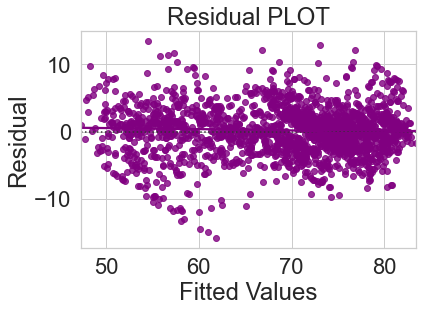

In [ ]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

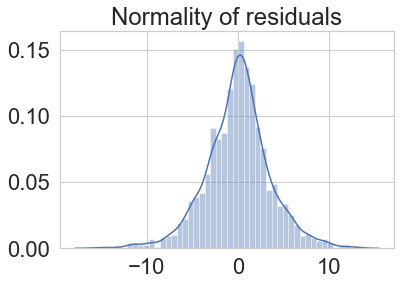

In [ ]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

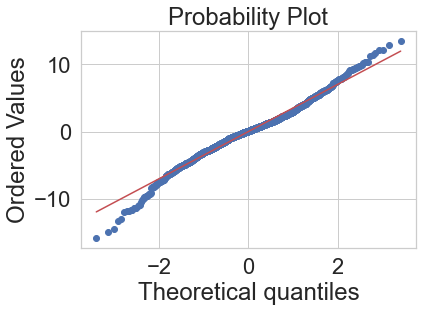

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [ ]:
stats.shapiro(residual)

ShapiroResult(statistic=0.983966052532196, pvalue=1.9597447240850795e-14)

* The residuals are not normal as per shapiro test, but as per QQ plot they are approximately normal.
* The issue with shapiro test is when dataset is big, even for small deviations, it shows data as not normal
* Hence we go with QQ plot and say that residuals are normal
* We can try to treat data for outliers and see if that helps in further normalising the residual curve

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train8)
lzip(name, test)

[('F statistic', 1.0700869119964636), ('p-value', 0.14119458799080997)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

### Predicting on the test data

In [ ]:
X_train8.columns

Index(['const', 'Year', 'Adult_Mortality', 'Alcohol', 'Percentage_expenditure',
       'Hepatitis_B', 'Under_five_deaths', 'Polio', 'Diphtheria', 'HIV_AIDS',
       'Population', 'Thinness_5_9_years', 'Income_composition_of_resources',
       'Schooling', 'Continent_Asia', 'Continent_Europe',
       'Continent_North America', 'Continent_Oceania',
       'Continent_South America', 'Status_Developing'],
      dtype='object')

* Selecting columns from test data that we used to create our final model

In [ ]:
X_test_final = X_test[X_train8.columns]

In [ ]:
X_test_final.head()

const  Year  Adult_Mortality  Alcohol  Percentage_expenditure  \
2546  1.000  2006          123.000    0.970                 122.652   
650   1.000  2006          113.000   11.830                1096.807   
1740  1.000  2007          125.000    4.980                 678.519   
177   1.000  2014            7.000    1.570                 367.256   
1377  1.000  2000          428.000    1.510                   0.682   

      Hepatitis_B  Under_five_deaths  Polio  Diphtheria  HIV_AIDS  \
2546       83.000                 10 83.000      49.500     0.100   
650        92.000                  0 96.000      96.000     0.100   
1740       61.000                  0 92.000      92.000     0.100   
177        98.000                  0 98.000      98.000     0.100   
1377       92.000                 70 49.500      82.000     1.850   

       Population  Thinness_5_9_years  Income_composition_of_resources  \
2546 10832552.250               6.300                            0.636   
650       444.000               1.800                            0.783   
1740   615875.000               2.200                            0.762   
177   1386542.000               6.000                            0.820   
1377  3145483.000               9.100                            0.448   

      Schooling  Continent_Asia  Continent_Europe  Continent_North America  \
2546     11.400               1                 0                        0   
650      13.900               0                 1                        0   
1740     13.600               0                 1                        0   
177      14.500               1                 0                        0   
1377      8.400               0                 0                        0   

      Continent_Oceania  Continent_South America  Status_Developing  
2546                  0                        0                  1  
650                   0                        0                  0  
1740                  0                        0                  1  
177                   0                        0                  1  
1377                  0                        0                  1

In [ ]:
y_pred = olsres7.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [ ]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 3.5396676743692783
Test error: 3.4413713711816762


### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres7" is good for prediction as well as inference purpose


In [ ]:
olsmod7 = sm.OLS(y_train, X_train8)
olsres7 = olsmod7.fit()
print(olsres7.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     650.1
Date:                Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                        12:15:51   Log-Likelihood:                -5516.2
No. Observations:                2056   AIC:                         1.107e+04
Df Residuals:                    2036   BIC:                         1.118e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

### Observations
* Now this is our final model which follows all the assumptions and this can be used for interpretations

          1. Mortality rates come out to be very signifcant, as expected. There are two variable - under_five_deaths and Adult_mortality. As these two increase, the total life expectancy decreases, as visible in the negative coeefficinet sign 
          2. 1 unit increase in alcohol value (per capita consumption of pure alcohol in litres) leads to decrease in life expectancy by 0.0984 years (~35 days !)
          3. Diseases like "Hepatitis B and  HIV-AIDS" decrease the Life expectancy
          4. Developing countries tend to have less life expectancy but as the country status will change to developed, 
             life expectancy will increase too
          5. Year, percentage expenditure, Polio (refers to polio immunization), Diptheria(refers to diptheria immunization), 
             population, Income, Schooling are positively correlated , so as they will increase life expectancy will also 
             incease.

## Forward Feature Selection 
### forward feature selection starts with an empty model and adds in variables one by one.
* In each forward step, you add the one variable that gives the single best improvement to your model.


In [ ]:
X_train_new = X_train3.drop('const', axis = 1)

* We'll use forward feature selection on variables, we received after removing multicollinearity
* Also we'll remove const term, because sklearn adds that automatically unlike statmodels

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin

In [ ]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = 24,forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s finished

[2020-11-05 20:19:04] Features: 1/24 -- score: 0.6144379780544329[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished

[2020-11-05 20:19:05] Features: 2/24 -- score: 0.7540746121922296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.0s finished

[2020-11-05 20:19:06] Features: 3/24 -- score: 0.7897723030461783[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

### We can see that Adjusted-R square starts decreasing after addition of 19th feature, so we will proceed only with best 18 features

* Now we'll change k_features to 18, where k_features denotes "Number of features to select"

In [ ]:
clf = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(clf,k_features = 18,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_new, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.0s finished

[2020-11-05 20:20:02] Features: 1/18 -- score: 0.6144379780544329[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished

[2020-11-05 20:20:04] Features: 2/18 -- score: 0.7540746121922296[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.0s finished

[2020-11-05 20:20:05] Features: 3/18 -- score: 0.7897723030461783[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [ ]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 7, 8, 10, 11, 13, 15, 16, 17, 18, 19, 20, 22, 23]


In [ ]:
X_train4.columns[feat_cols]

Index(['Year', 'Adult_Mortality', 'Alcohol', 'Percentage_expenditure',
       'Hepatitis_B', 'Under_five_deaths', 'Polio', 'Diphtheria', 'HIV_AIDS',
       'Population', 'Thinness_5_9_years', 'Income_composition_of_resources',
       'Schooling', 'Continent_Asia', 'Continent_Europe',
       'Continent_North America', 'Continent_South America',
       'Status_Developing'],
      dtype='object')

### Now we will fit a sklearn model using these features only

In [ ]:
X_train_final = X_train4[X_train4.columns[feat_cols]]

In [ ]:
#
X_test.columns

Index(['const', 'Year', 'Adult_Mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'Thinness__1_19_years',
       'Thinness_5_9_years', 'Income_composition_of_resources', 'Schooling',
       'Continent_Asia', 'Continent_Europe', 'Continent_North America',
       'Continent_Oceania', 'Continent_South America', 'Status_Developing'],
      dtype='object')

In [ ]:
#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [ ]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)                              

Intercept of the linear equation: [-155.63977359]

COefficients of the equation are: [[ 1.10311218e-01 -1.46146608e-02 -9.82498146e-02  1.64573474e-03
  -3.60967533e-02 -4.78889235e-02  2.59839509e-02  3.86941839e-02
  -4.54468669e+00  6.00530890e-08 -9.11451221e-02  7.51790227e+00
   2.69101034e-01  1.56265645e+00  1.68166713e+00  4.27913502e+00
   2.43510635e+00 -2.99337960e+00]]


In [ ]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.8584403495763306
r2 score on test data : 0.8721783597544529


In [ ]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 3.5402333189953104
rmse on test data : 3.4427831205010384


### Both r2 score and RMSE  shows that model fitted is good, has no overfitting and can be used for making predictions 

### we can observe here, the results from 'olsreg7' and 'linearegession' model are approximately same

### In case when we have lots of features, instead of removing features on the basis of p values manually, we can go for forward selection also

# Appendix:


- **warnings.filterwarnings("ignore")** : Never print matching warnings.

- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **Numpy** : The fundamental package for scientific computing with Python.

- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

- **pairplot** : Plot pairwise relationships in a dataset.

- **boxplot** : Draw a box plot to show distributions with respect to categories.

- **distplot** : Flexibly plot a univariate distribution of observations.

- **pandas.DataFrame.corr** : Compute pairwise correlation of columns, excluding NA/null values.

- **sklearn.linear_model.LinearRegression** : Ordinary least squares Linear Regression.

- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.

- **statsmodels** : It is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    - An extensive list of result statistics are available for each estimator.
    - The results are tested against existing statistical packages to ensure that they are correct.
    - The online documentation is hosted at [statsmodels.org](https://www.statsmodels.org/stable/index.html).